Agregar descriptiva de a base de datos

# Autenticador Drive

In [ ]:
# vincular colab con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Librerias

In [ ]:
# @title Instalar libreria
!pip install sweetviz
!pip install category_encoders

In [ ]:
import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw

# Funciones

In [ ]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

# Ruta de datos

In [ ]:
# ruta de la carpeta donde están guardadas las bases de datos
path="DATOS/"

# Base de datos

In [ ]:
import polars as pl # librería para trabajar con dataframes grandes

In [ ]:
%pip install fastexcel # librería para leer archivos excel grandes

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# cargamos cada una de las bases de datos
bbdd1 = pl.read_excel(path+"2019 unificado.xlsx")
bbdd2 = pl.read_excel(path+"2020 unificado.xlsx")
bbdd3 = pl.read_excel(path+"2021 unificado.xlsx")
bbdd4 = pl.read_excel(path+"2022 unificado.xlsx")
bbdd5 = pl.read_excel(path+"2023 unificado.xlsx")
bbdd6 = pl.read_excel(path+"2024 unificado.xlsx")



In [ ]:
# Realizo una transformación de los dataframes a pandas para poder trabajar con ellos
bbdd1 = bbdd1.to_pandas()
bbdd2 = bbdd2.to_pandas()
bbdd3 = bbdd3.to_pandas()
bbdd4 = bbdd4.to_pandas()
bbdd5 = bbdd5.to_pandas()
bbdd6 = bbdd6.to_pandas()

In [ ]:
# Rename columns, removing whitespace
def clean_column_names(df):
  new_columns = []
  for col in df.columns:
    new_col = col.strip() # removes leading/trailing whitespaces
    new_columns.append(new_col)
  df.columns = new_columns
  return df

bbdd2 = clean_column_names(bbdd2)
bbdd3 = clean_column_names(bbdd3)
bbdd4 = clean_column_names(bbdd4)
bbdd5 = clean_column_names(bbdd5)
bbdd6 = clean_column_names(bbdd6)

In [ ]:
bbdd_final = pd.concat([bbdd6])

In [ ]:
bbdd_final.PROD.value_counts()

PROD
603     43000
3304    13169
6204    10991
901      9909
3923     9250
        ...  
8401        1
1007        1
5307        1
8606        1
9304        1
Name: count, Length: 1095, dtype: int64

In [ ]:
bbdd_final[bbdd_final.prod]

In [ ]:
bbdd_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480078 entries, 0 to 480077
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FECH      480078 non-null  int64  
 1   ADUA      480078 non-null  int64  
 2   PAIS      480078 non-null  int64  
 3   COD_PAI4  480078 non-null  object 
 4   COD_SAL1  480078 non-null  int64  
 5   COD_SAL   480078 non-null  object 
 6   DPTO2     480078 non-null  int64  
 7   VIA       480078 non-null  int64  
 8   BANDERA   480078 non-null  int64  
 9   REGIM     480078 non-null  int64  
 10  MODAD     480078 non-null  int64  
 11  FINALID   480078 non-null  int64  
 12  CER_ORI1  480078 non-null  int64  
 13  SISESP    480078 non-null  int64  
 14  POSAR     480078 non-null  int64  
 15  PROD      480078 non-null  int64  
 16  DPTO1     480078 non-null  int64  
 17  UNID      480078 non-null  int64  
 18  CODUNI2   480078 non-null  object 
 19  CANTI     480078 non-null  float64
 20  PBK 

# Limpieza de datos

In [ ]:
bbdd_final.head(3)

,FECH,ADUA,PAIS,COD_PAI4,COD_SAL1,COD_SAL,DPTO2,VIA,BANDERA,REGIM,...,PBK,PNK,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG,NIT,RAZ_SIAL
0,1901,1,249,USA,0,AXM,68,7,249,1,...,112893.56,112893.56,107992.78,337473117.8,0.0,0.0,0.0,0.0,830095617,ENERGIZAR S.A.S
1,1901,1,924,XCF,0,AXM,25,3,169,1,...,1351.0,1200.0,7040.10,22021925.6,0.0,0.0,0.0,0.0,900410496,DESTILADOS EXOTICOS S A S
2,1901,3,13,AFG,3,BOG,11,4,249,1,...,184.0,128.0,5600.00,17698912.0,0.0,0.0,0.0,0.0,800199889,BLINDEX S.A.


In [ ]:
# muestra los datos únicos dentro de una variable
bbdd_final.NIT.unique()

array([830095617, 900410496, 800199889, ..., 900610505, 901161864, nan],
      dtype=object)

In [ ]:
# después de analizar cuales columnas no nos interesan, las eliminamos
#nivel.drop(columns=['Latitud', 'Longitud', 'Altitud','Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
#                    'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta','DescripcionSerie', 'Frecuencia',
#                    'Grado','Calificador', 'NivelAprobacion'], inplace=True)

In [ ]:
bbdd_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2866602 entries, 0 to 480077
Data columns (total 29 columns):
 #   Column    Dtype  
---  ------    -----  
 0   FECH      int64  
 1   ADUA      int64  
 2   PAIS      int64  
 3   COD_PAI4  object 
 4   COD_SAL1  int64  
 5   COD_SAL   object 
 6   DPTO2     int64  
 7   VIA       int64  
 8   BANDERA   int64  
 9   REGIM     int64  
 10  MODAD     int64  
 11  FINALID   int64  
 12  CER_ORI1  int64  
 13  SISESP    int64  
 14  POSAR     int64  
 15  DPTO1     int64  
 16  UNID      int64  
 17  CODUNI2   object 
 18  CANTI     float64
 19  PBK       object 
 20  PNK       object 
 21  FOBDOL    float64
 22  FOBPES    float64
 23  AGRENA    float64
 24  FLETES    float64
 25  SEGURO    float64
 26  OTROSG    float64
 27  NIT       object 
 28  RAZ_SIAL  object 
dtypes: float64(7), int64(15), object(7)
memory usage: 656.1+ MB


In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {bbdd_final.shape}")

Forma de los datos (filas, columnas): (2866602, 30)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(bbdd_final.dtypes)


Tipos de datos por columna:
FECH          int64
ADUA          int64
PAIS          int64
COD_PAI4     object
COD_SAL1      int64
COD_SAL      object
DPTO2         int64
VIA           int64
BANDERA       int64
REGIM         int64
MODAD         int64
FINALID       int64
CER_ORI1      int64
SISESP        int64
POSAR         int64
DPTO1         int64
UNID          int64
CODUNI2      object
CANTI       float64
PBK          object
PNK          object
FOBDOL      float64
FOBPES      float64
AGRENA      float64
FLETES      float64
SEGURO      float64
OTROSG      float64
NIT          object
RAZ_SIAL     object
dtype: object


In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(bbdd_final.nunique())


Valores únicos por columna:
FECH             72
ADUA             21
PAIS            249
COD_PAI4        209
COD_SAL1         20
COD_SAL          26
DPTO2            33
VIA              10
BANDERA         179
REGIM             5
MODAD            11
FINALID           2
CER_ORI1          8
SISESP            3
POSAR          6561
DPTO1            34
UNID             10
CODUNI2          10
CANTI        476095
PBK          732263
PNK          534271
FOBDOL      1288886
FOBPES      2757959
AGRENA       498862
FLETES       228038
SEGURO        40749
OTROSG        52602
NIT           21200
RAZ_SIAL      23313
dtype: int64


In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(bbdd_final.isnull().sum())


Datos faltantes por columna:
FECH             0
ADUA             0
PAIS             0
COD_PAI4         1
COD_SAL1         0
COD_SAL          0
DPTO2            0
VIA              0
BANDERA          0
REGIM            0
MODAD            0
FINALID          0
CER_ORI1         0
SISESP           0
POSAR            0
DPTO1            0
UNID             0
CODUNI2          0
CANTI            0
PBK              0
PNK              0
FOBDOL           0
FOBPES           0
AGRENA           0
FLETES           0
SEGURO           0
OTROSG           0
NIT         978912
RAZ_SIAL    978916
dtype: int64


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(bbdd_final)
df_analizado

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,FECH,2866602,72,0,0.000000,2866602
1,ADUA,2866602,21,0,0.000000,2866602
2,PAIS,2866602,249,0,0.000000,2866602
3,COD_PAI4,2866602,209,1,0.000035,2866601
4,COD_SAL1,2866602,20,0,0.000000,2866602
5,COD_SAL,2866602,26,0,0.000000,2866602
6,DPTO2,2866602,33,0,0.000000,2866602
7,VIA,2866602,10,0,0.000000,2866602
8,BANDERA,2866602,179,0,0.000000,2866602
9,REGIM,2866602,5,0,0.000000,2866602


In [ ]:
# @title Realizamos la descriptiva estadística
bbdd_final.describe()

,FECH,ADUA,PAIS,COD_SAL1,DPTO2,VIA,BANDERA,REGIM,MODAD,FINALID,...,POSAR,DPTO1,UNID,CANTI,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG
count,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,...,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06,2.866602e+06
mean,2.156524e+03,3.760829e+01,3.582627e+02,1.325067e+01,2.206959e+01,3.367663e+00,3.780591e+02,1.013932e+00,1.909598e+02,1.074170e+00,...,4.258650e+09,2.180297e+01,2.381069e+01,2.117774e+05,9.354847e+04,3.690882e+08,2.372144e+04,1.662147e+03,1.589127e+01,6.743394e+01
std,1.707347e+02,2.966123e+01,2.050433e+02,1.378676e+01,2.330460e+01,2.648090e+00,2.120220e+02,2.262777e-01,3.576191e+01,2.620475e-01,...,2.800856e+09,2.323174e+01,1.551034e+01,5.717945e+06,2.347894e+06,9.269092e+09,5.008378e+05,7.549853e+05,9.853130e+02,7.765610e+03
min,1.901000e+03,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.000000e+00,2.000000e+00,1.000000e+00,...,1.012100e+08,0.000000e+00,1.100000e+01,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.007000e+03,3.000000e+00,2.390000e+02,3.000000e+00,5.000000e+00,1.000000e+00,2.110000e+02,1.000000e+00,1.980000e+02,1.000000e+00,...,1.704901e+09,5.000000e+00,1.100000e+01,5.700000e+01,5.470800e+02,2.110690e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.201000e+03,3.700000e+01,2.490000e+02,6.000000e+00,1.100000e+01,3.000000e+00,3.510000e+02,1.000000e+00,1.980000e+02,1.000000e+00,...,3.920990e+09,1.100000e+01,1.900000e+01,6.400000e+02,3.640000e+03,1.405058e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.307000e+03,4.800000e+01,5.800000e+02,3.500000e+01,2.500000e+01,4.000000e+00,5.800000e+02,1.000000e+00,1.980000e+02,1.000000e+00,...,6.211430e+09,2.500000e+01,3.300000e+01,8.791000e+03,2.116068e+04,8.220824e+07,0.000000e+00,1.398000e+01,0.000000e+00,0.000000e+00
max,2.412000e+03,9.000000e+01,9.970000e+02,4.600000e+01,9.700000e+01,9.000000e+00,9.990000e+02,5.000000e+00,4.030000e+02,2.000000e+00,...,9.807200e+09,9.900000e+01,8.500000e+01,3.762722e+09,6.348916e+08,2.728720e+12,9.832695e+07,9.012125e+08,1.097104e+06,8.396386e+06


In [ ]:
bbdd_final = pd.concat([bbdd6])

bbdd2 = bbdd_final.dropna()
bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'ANÁLISIS DE GRÁFICOS'
advert_report = sw.analyze([bbdd2, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


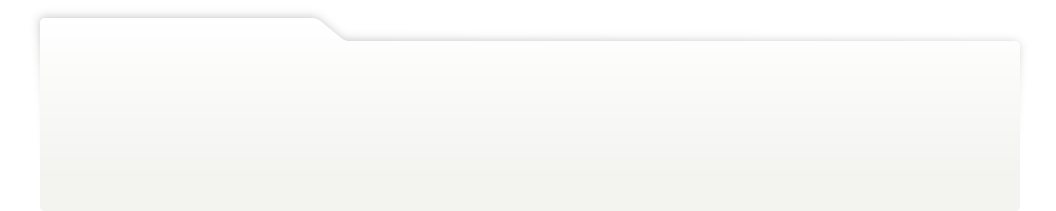
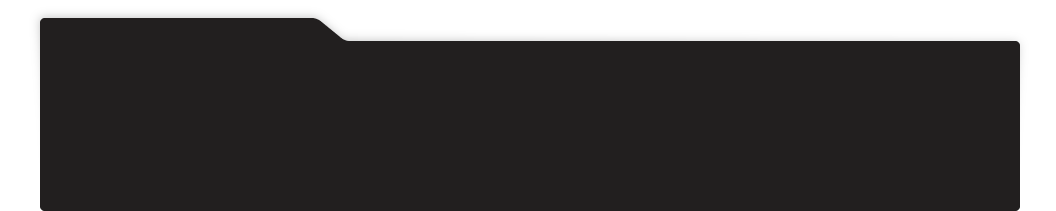
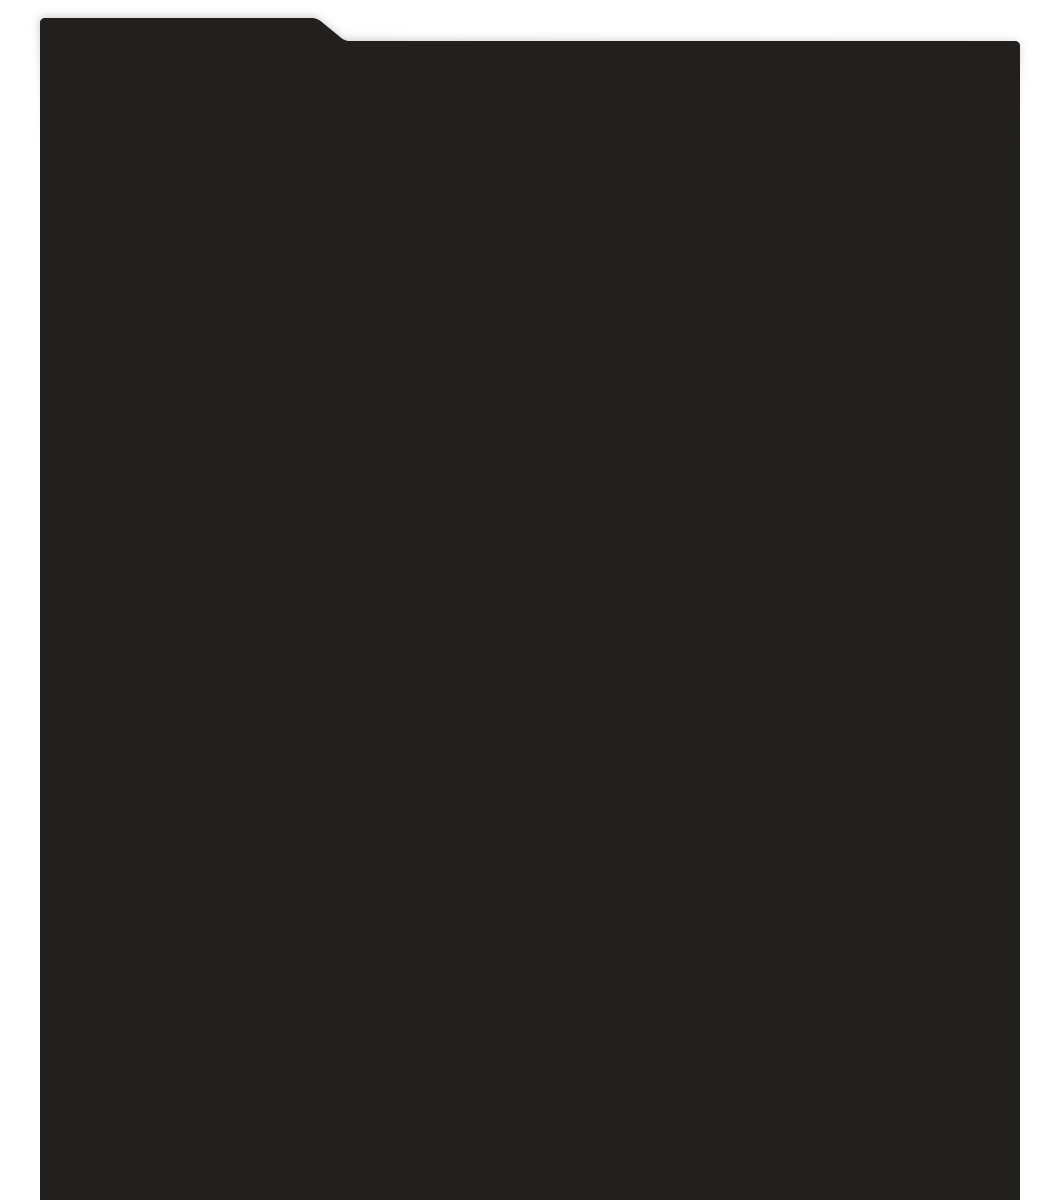
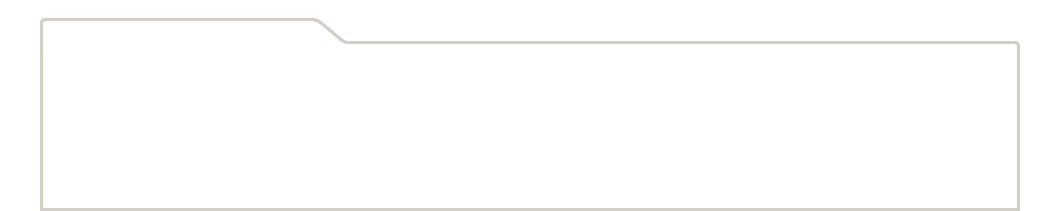
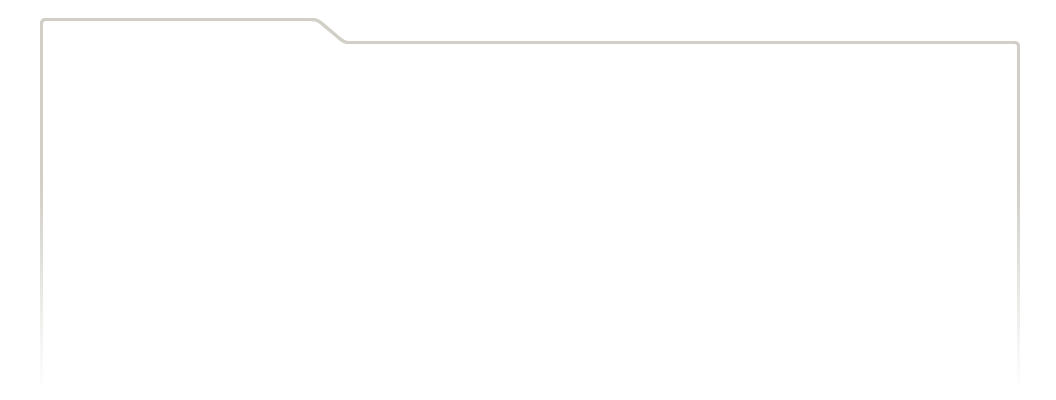
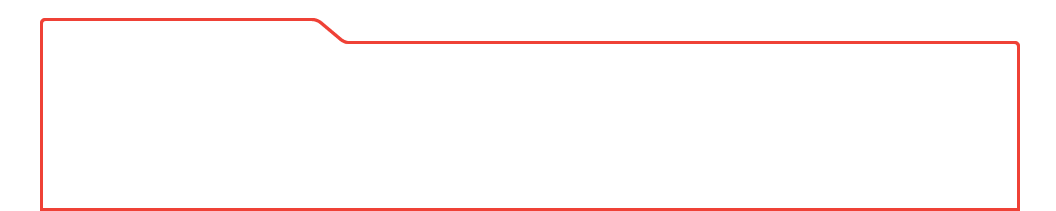
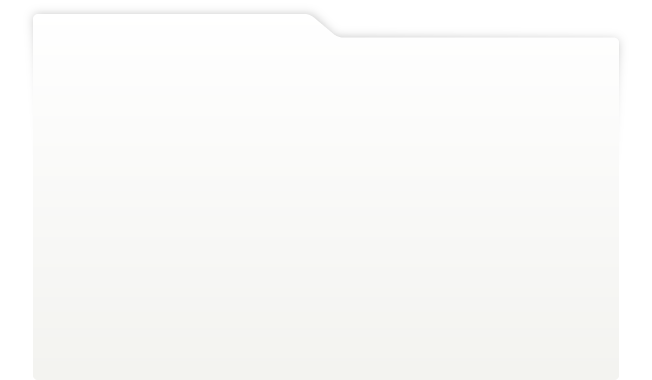
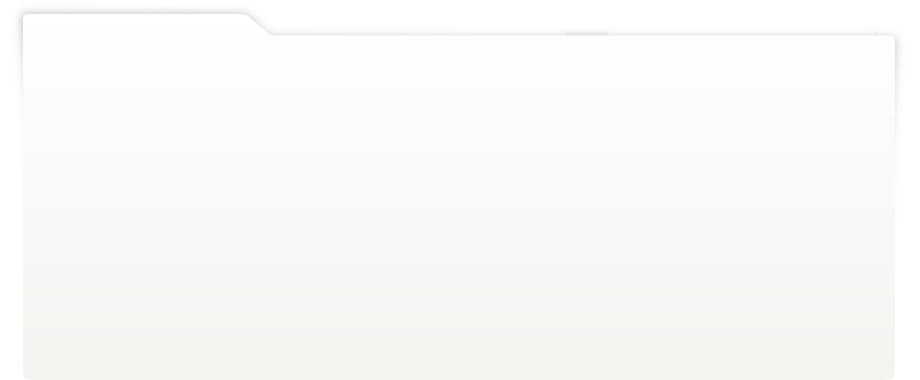
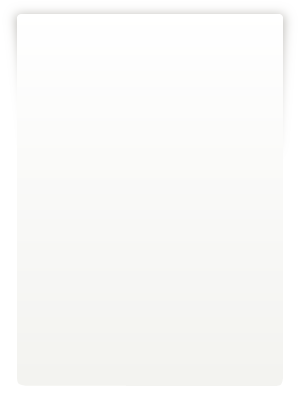
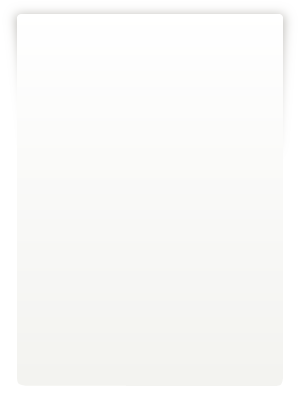
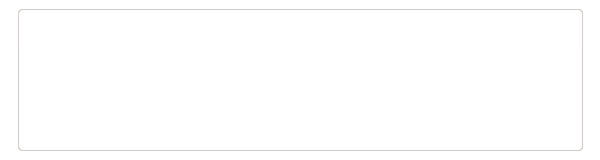
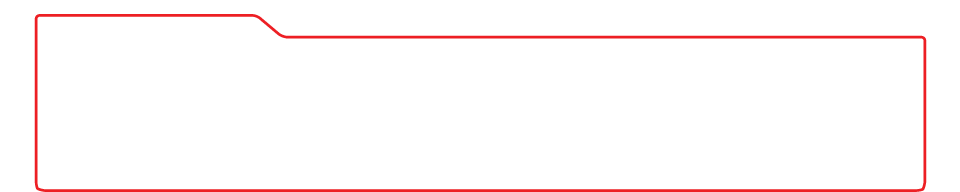
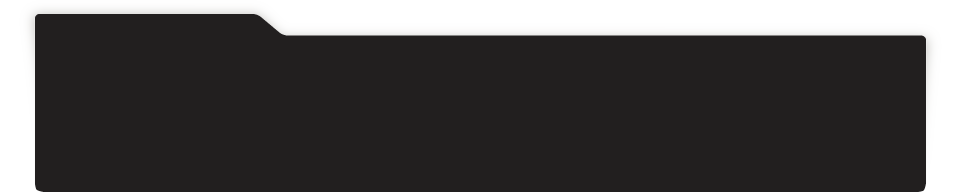
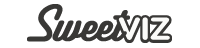
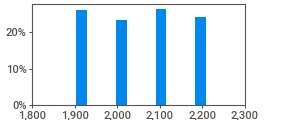
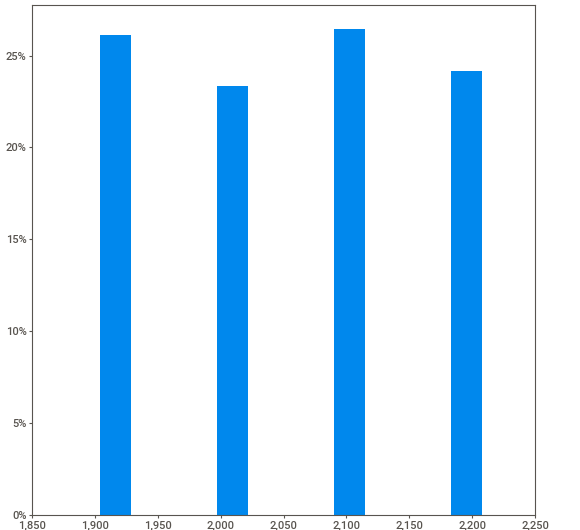
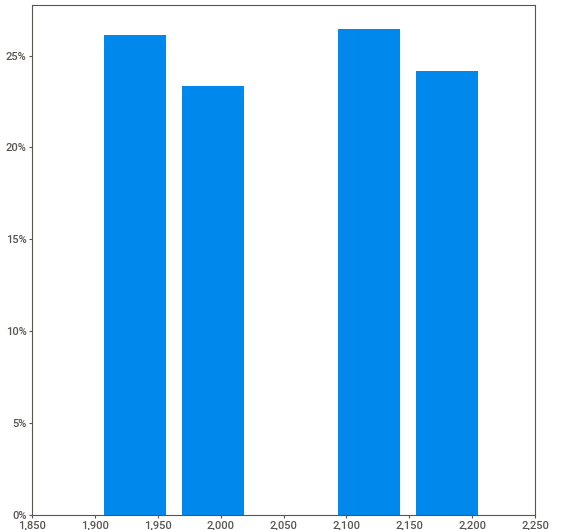
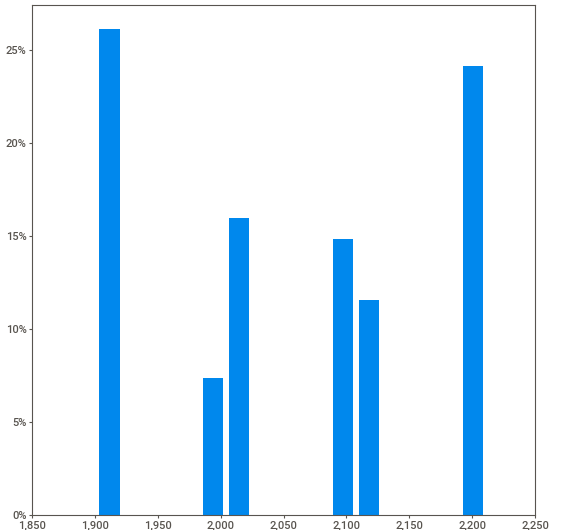
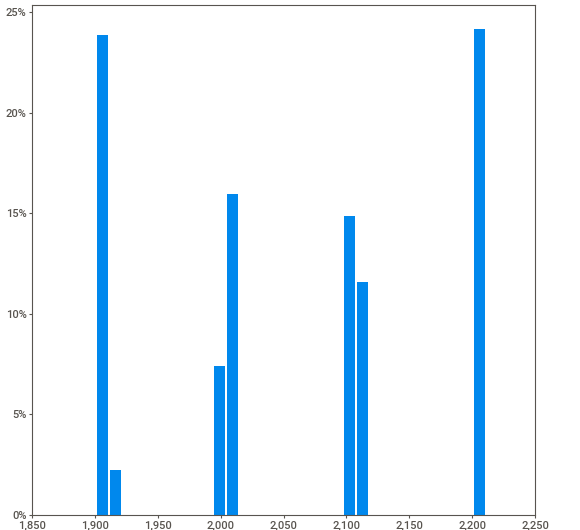
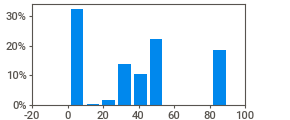
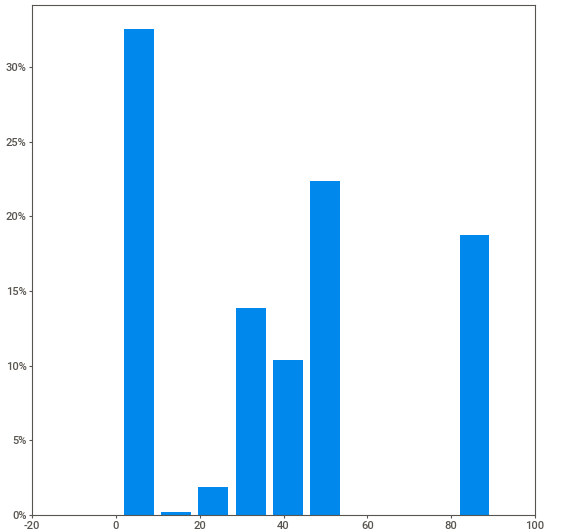
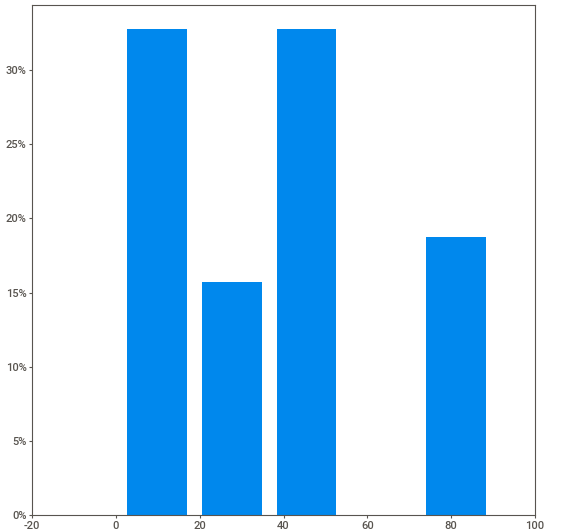
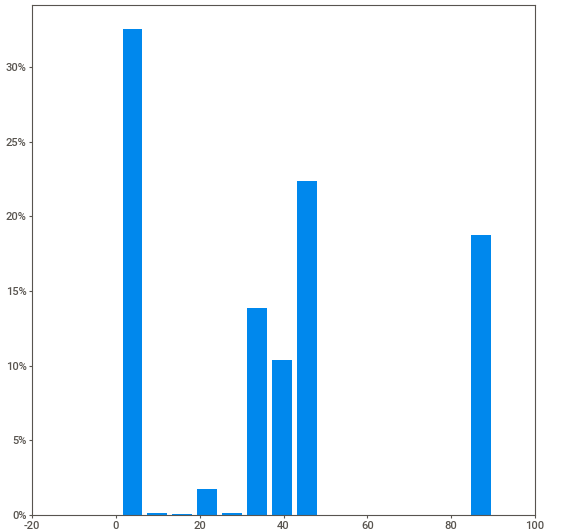
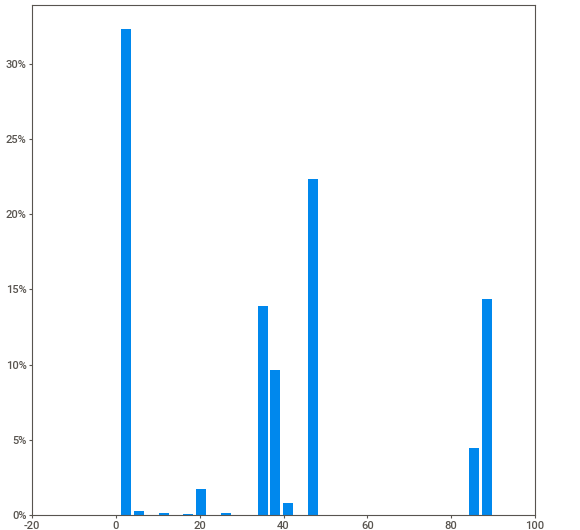
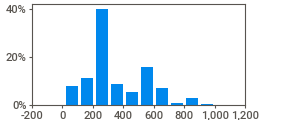
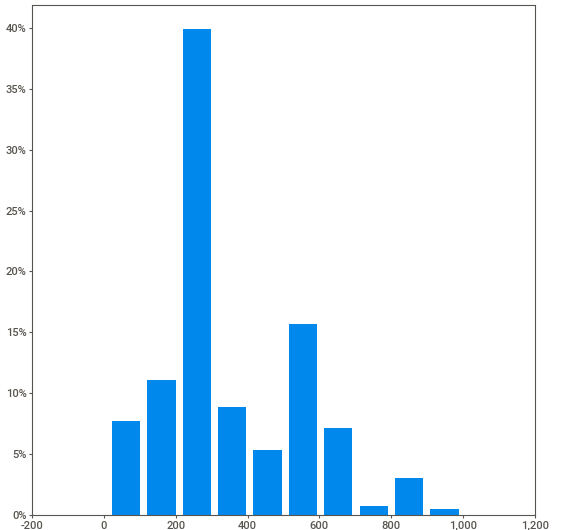
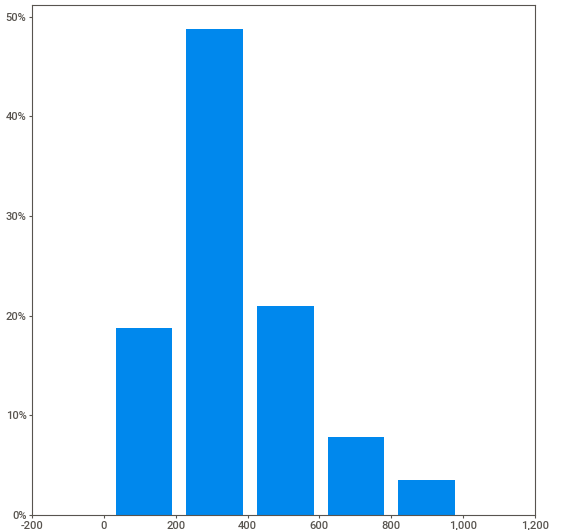
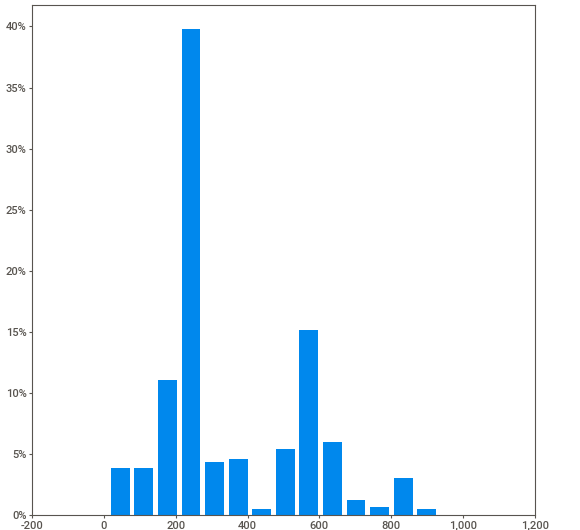
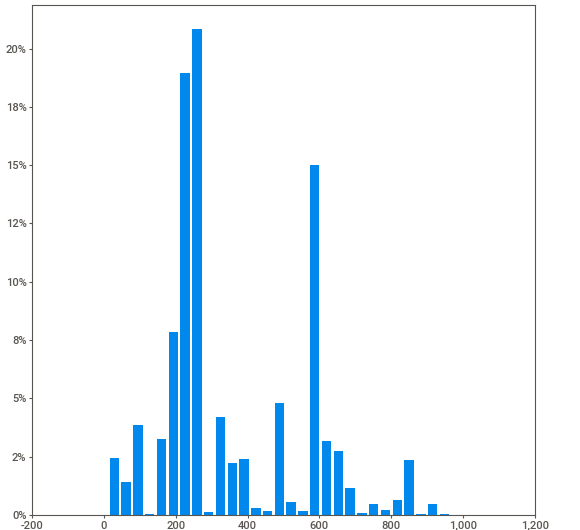
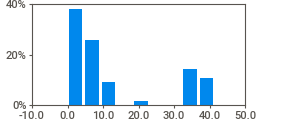
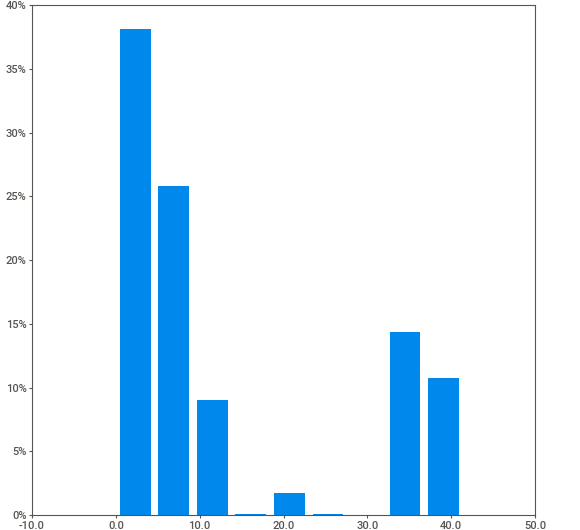
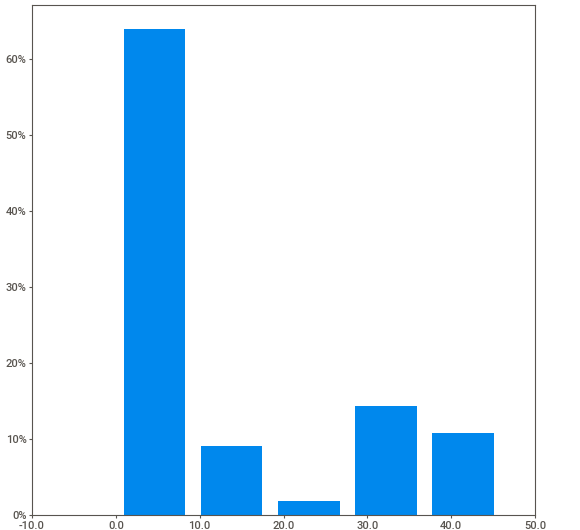
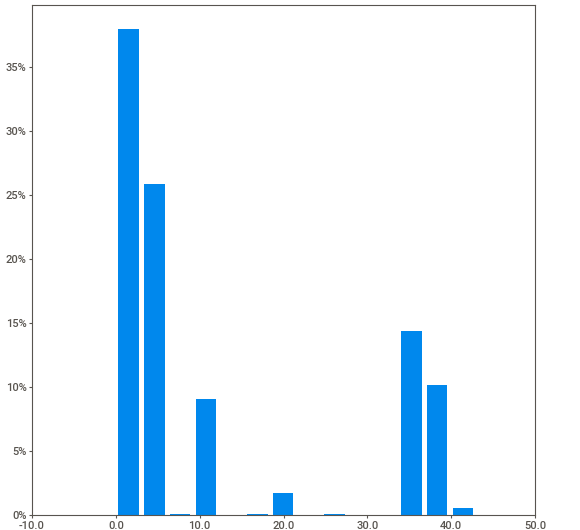
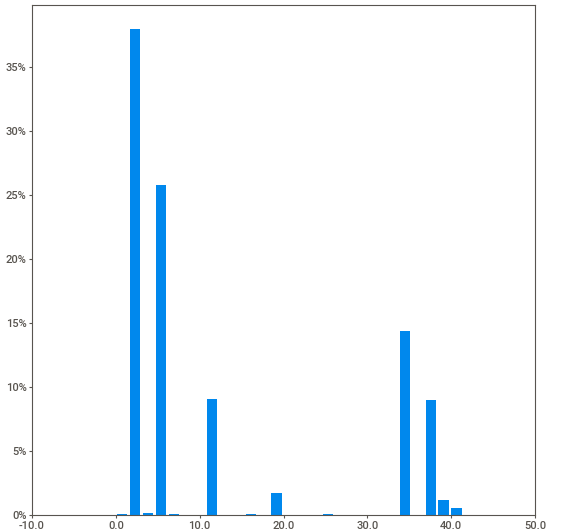
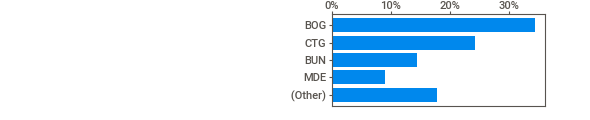
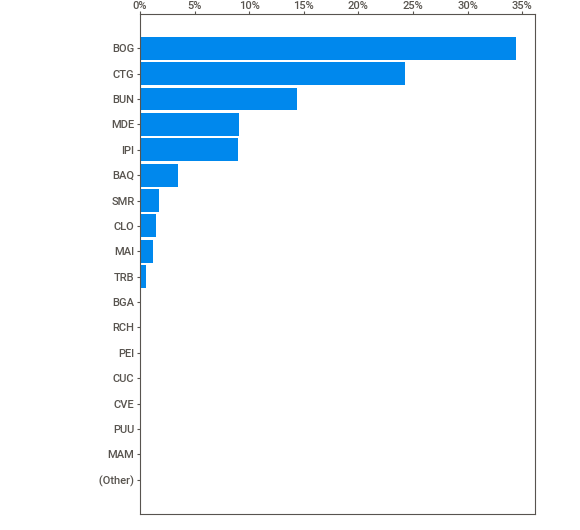
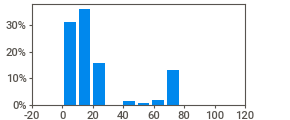
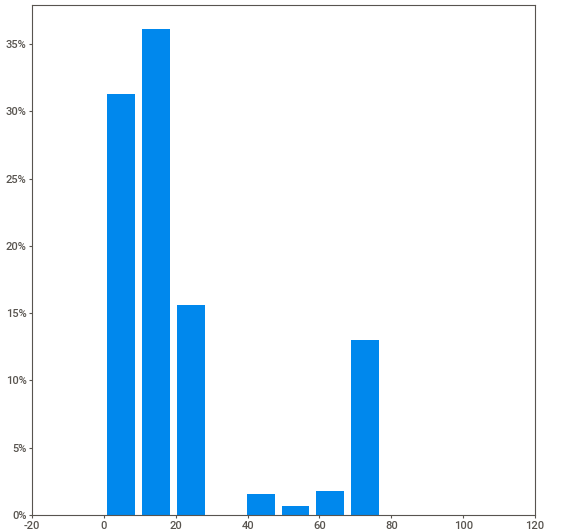
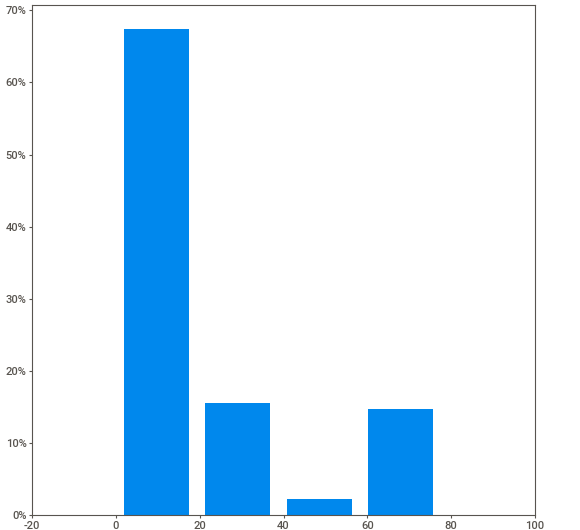
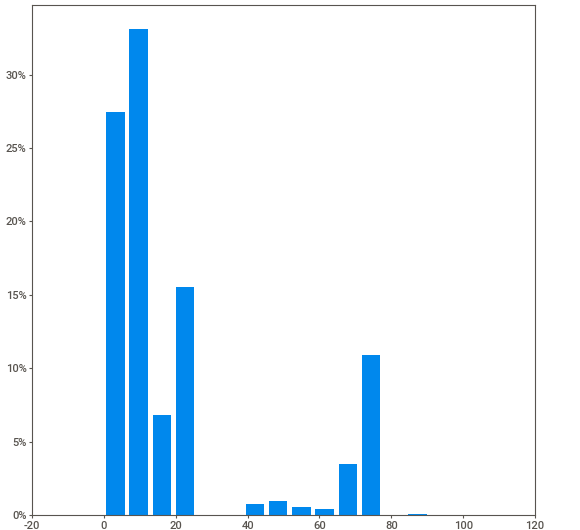
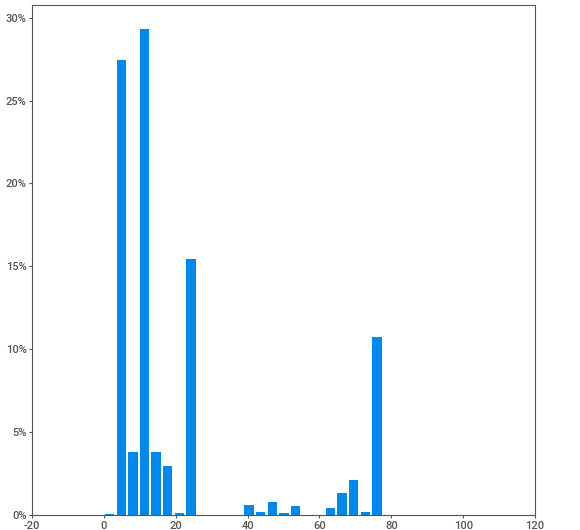
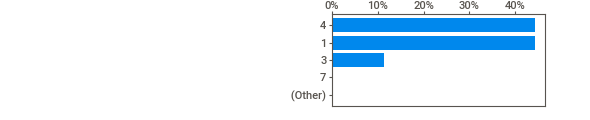
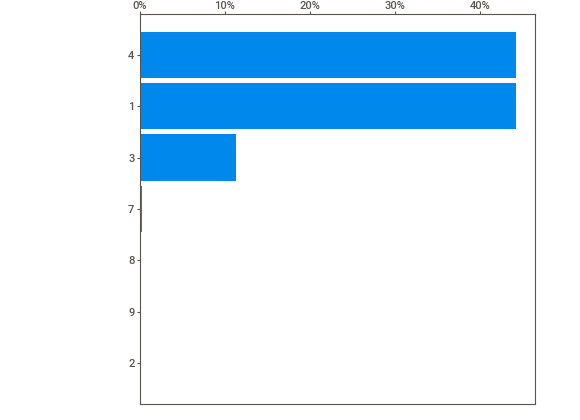
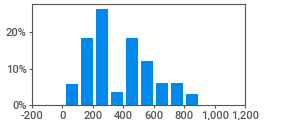
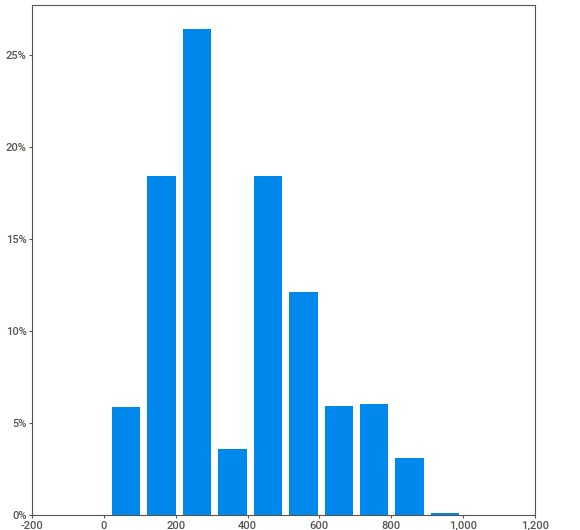
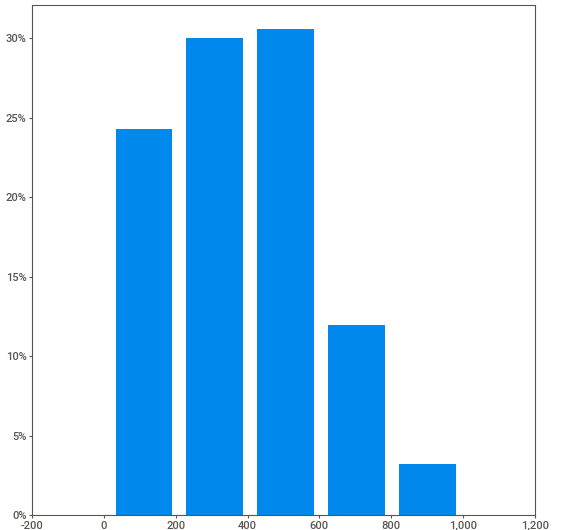
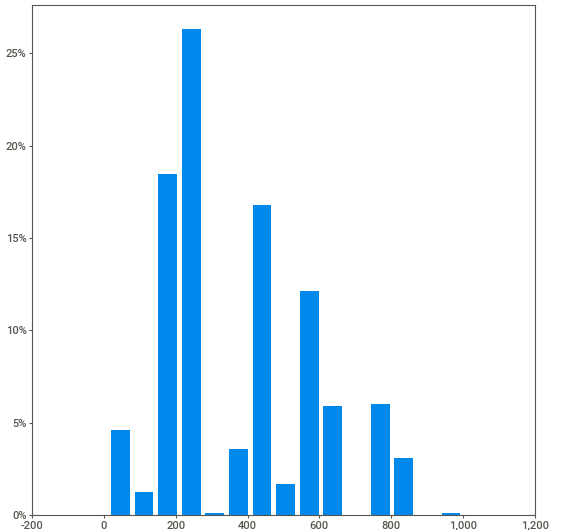
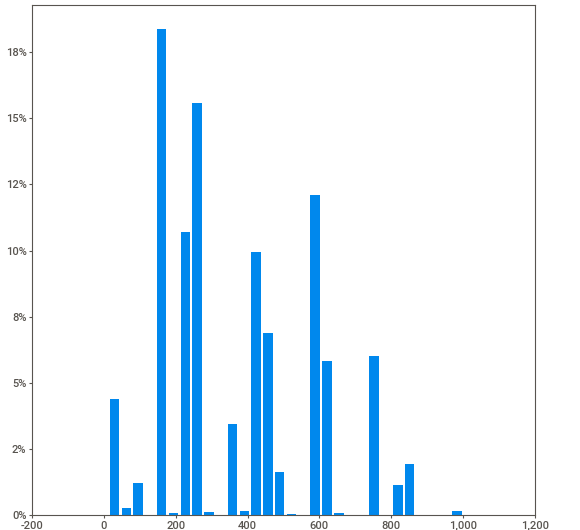
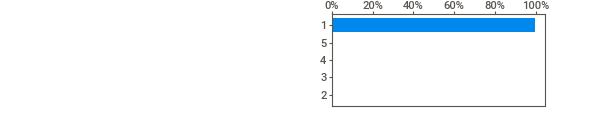
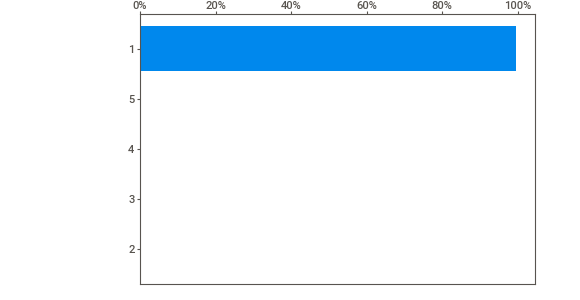
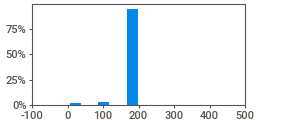
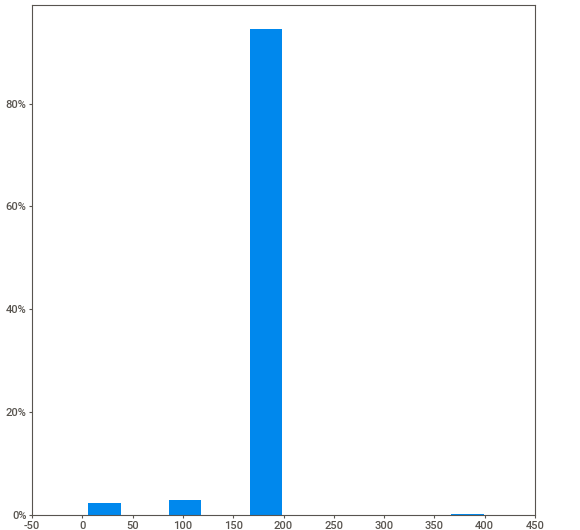
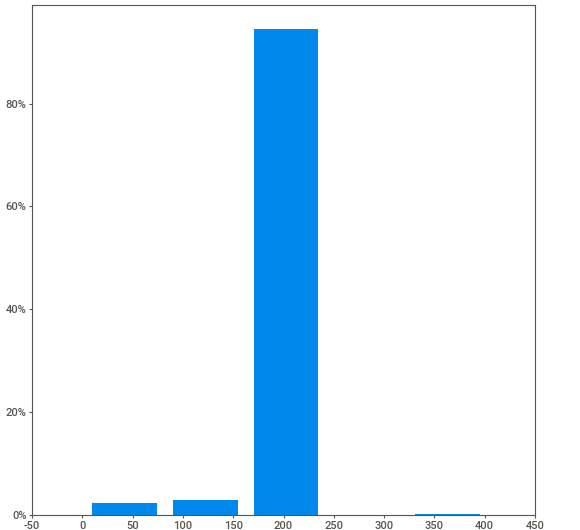
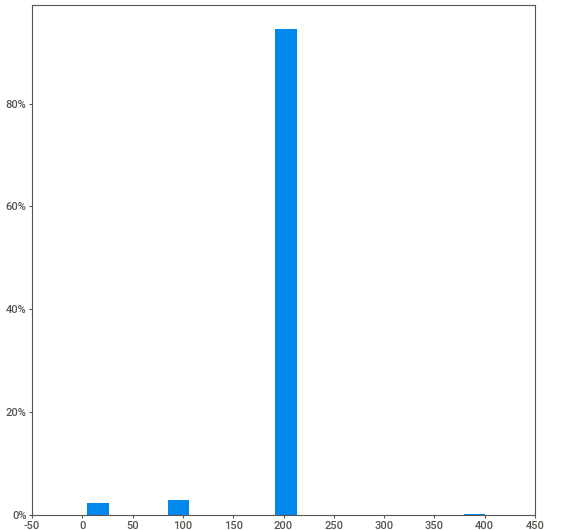
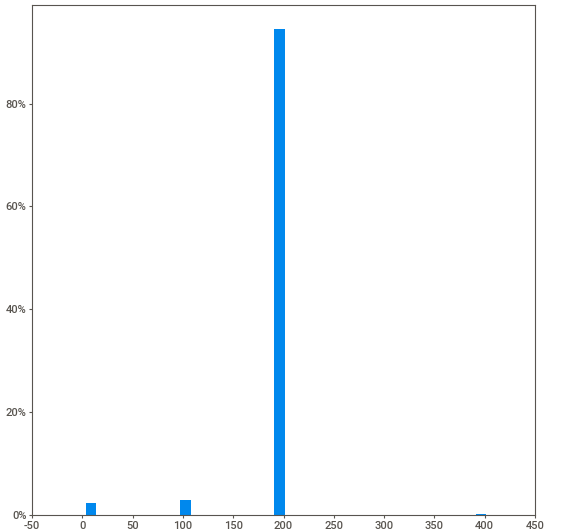
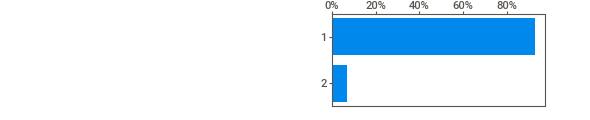
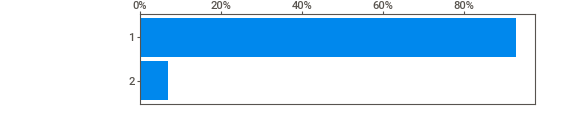
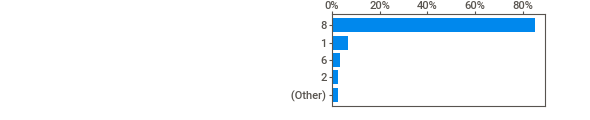
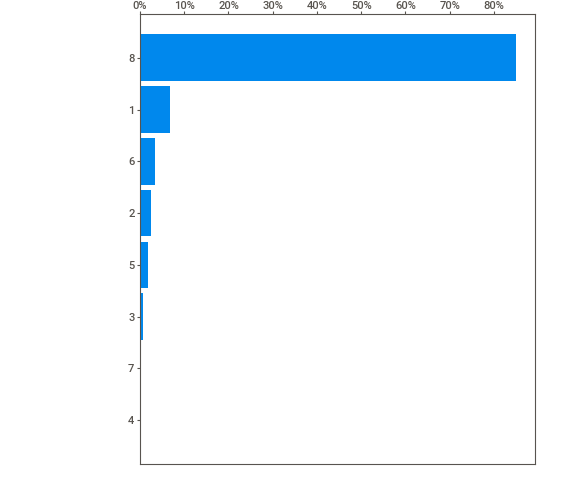
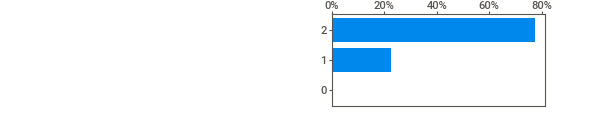
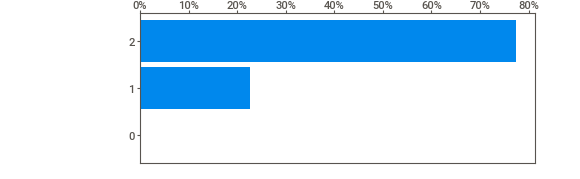
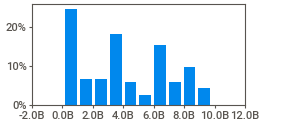
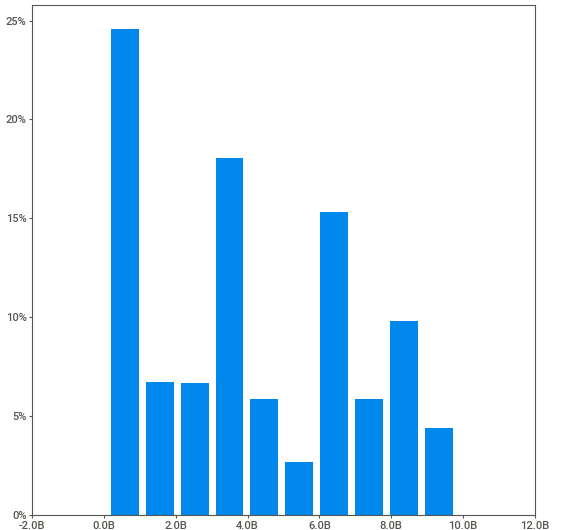
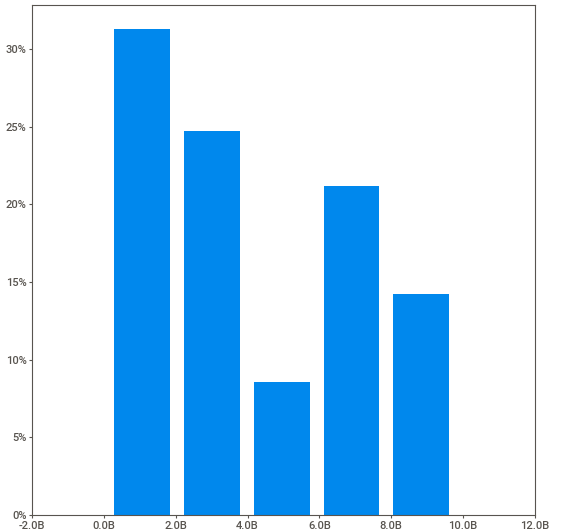
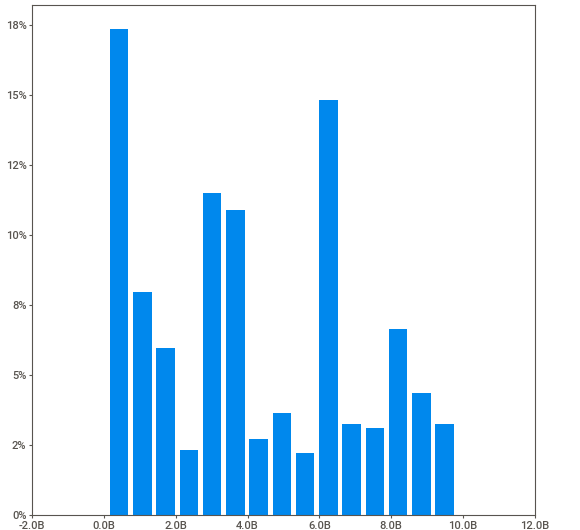
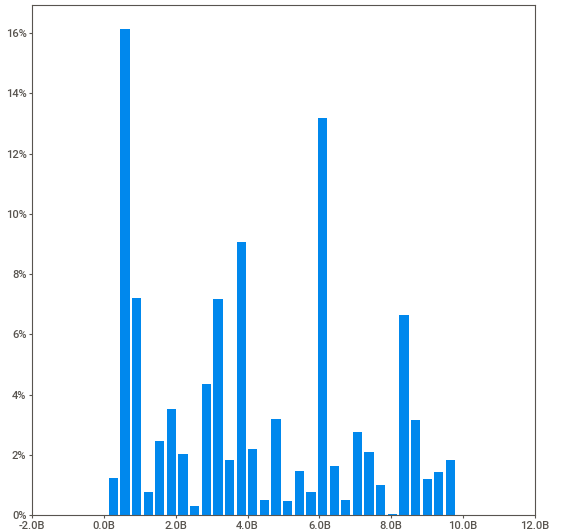
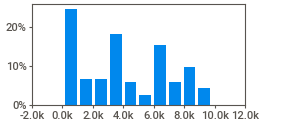
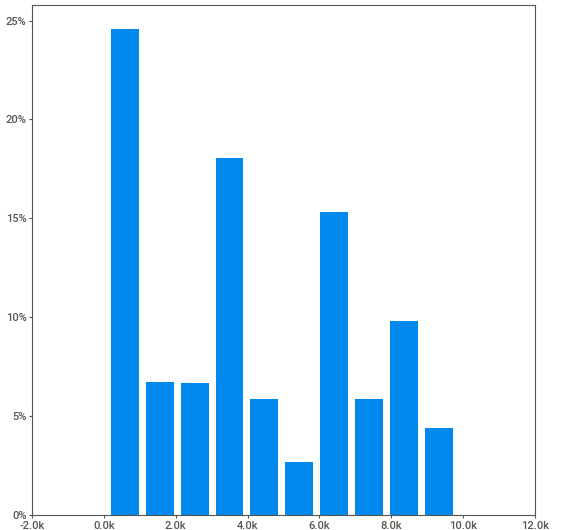
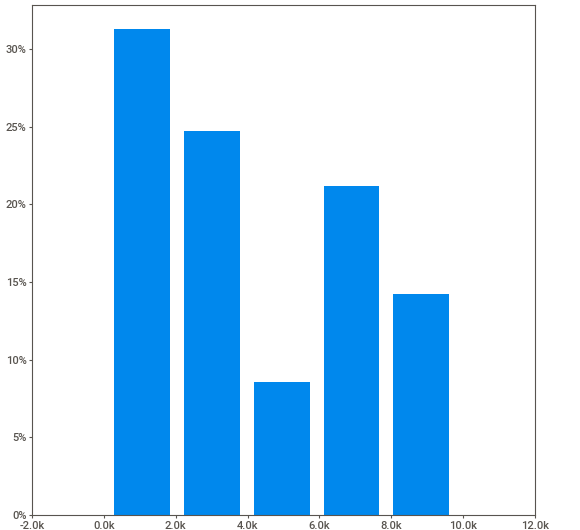
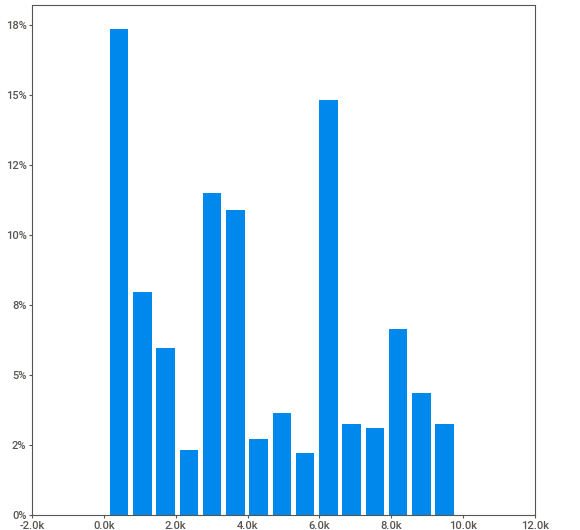
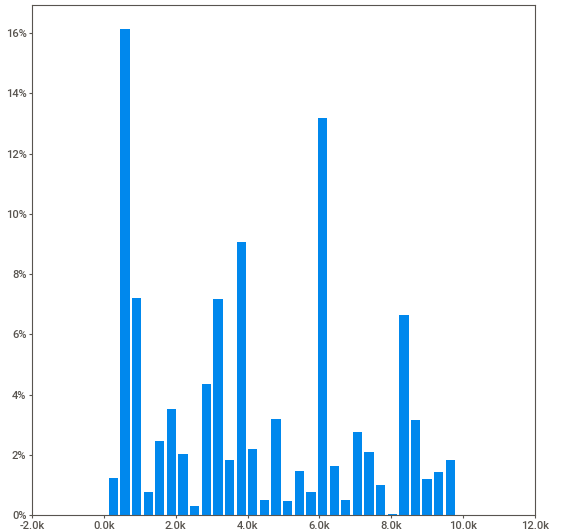
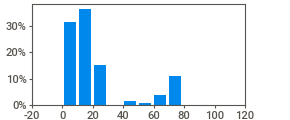
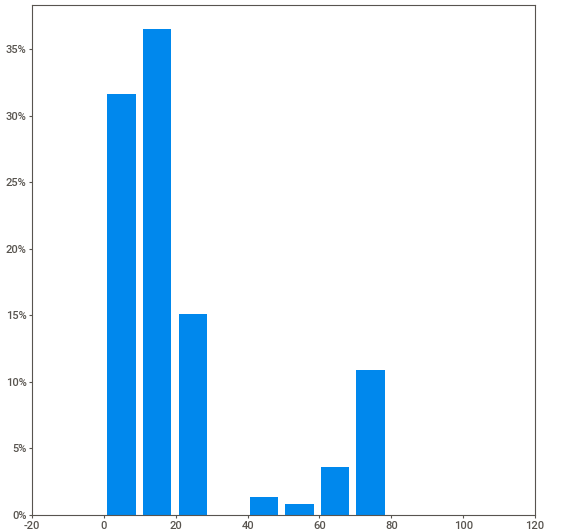
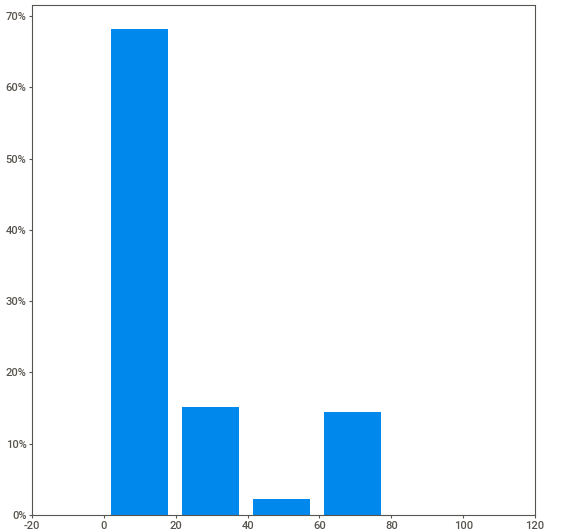
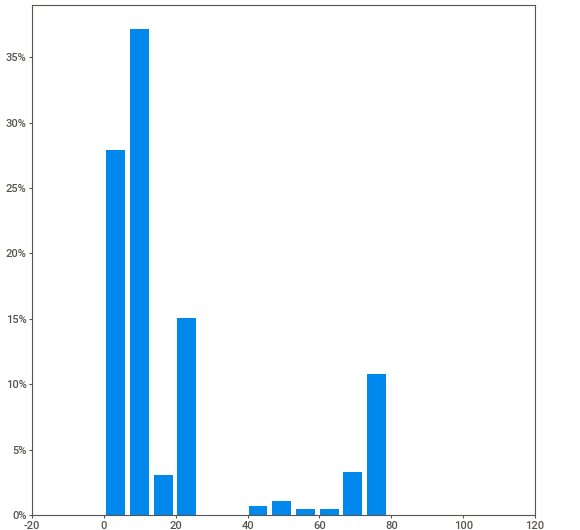
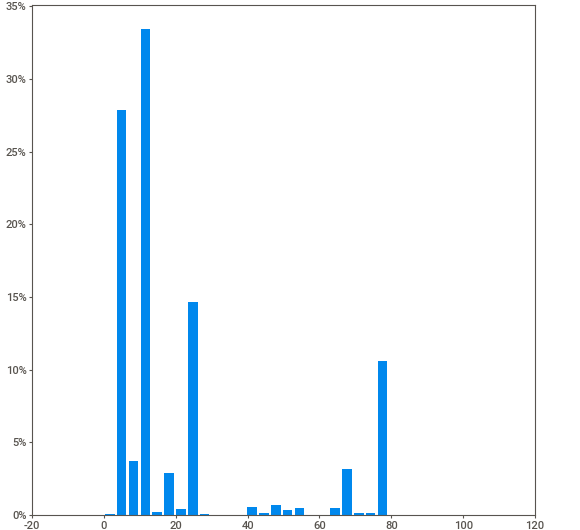
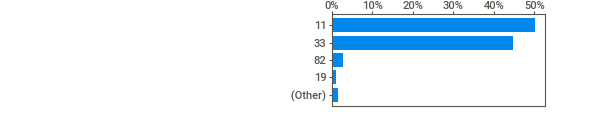
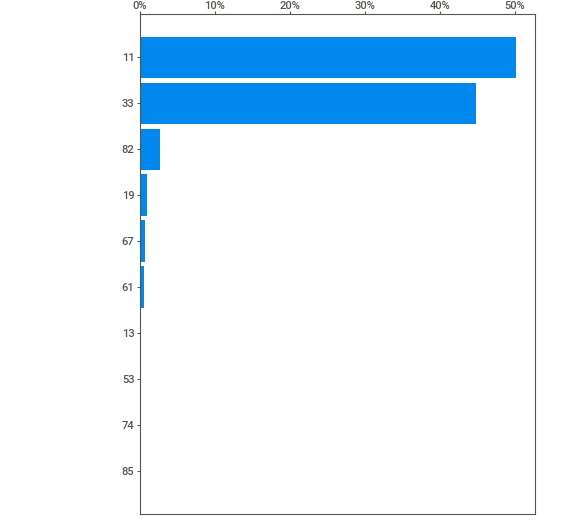
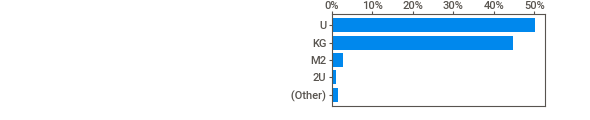
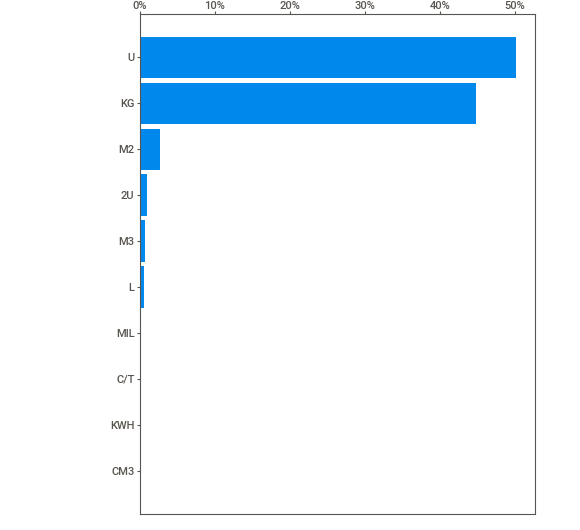
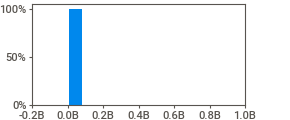
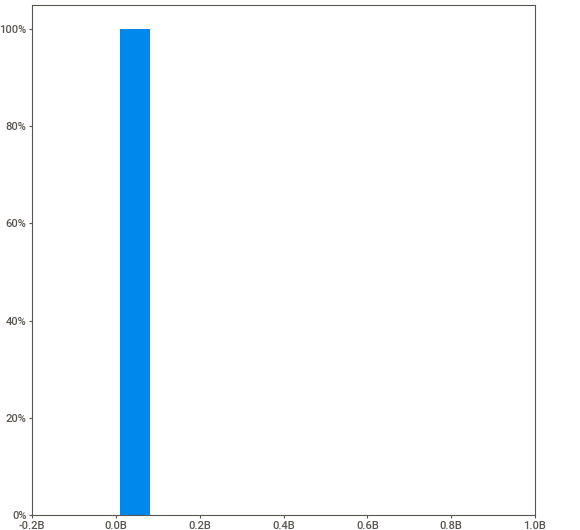
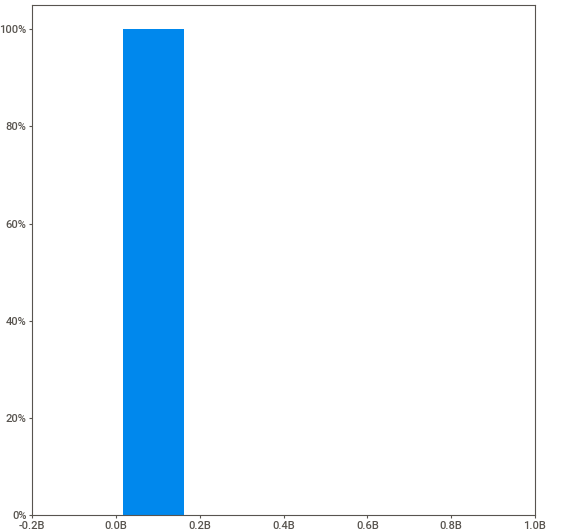
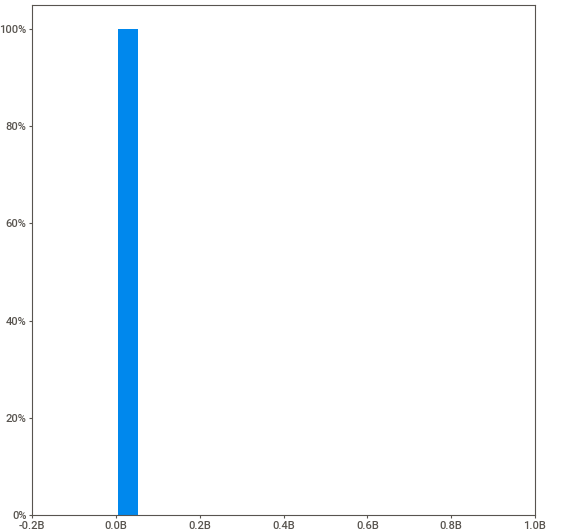
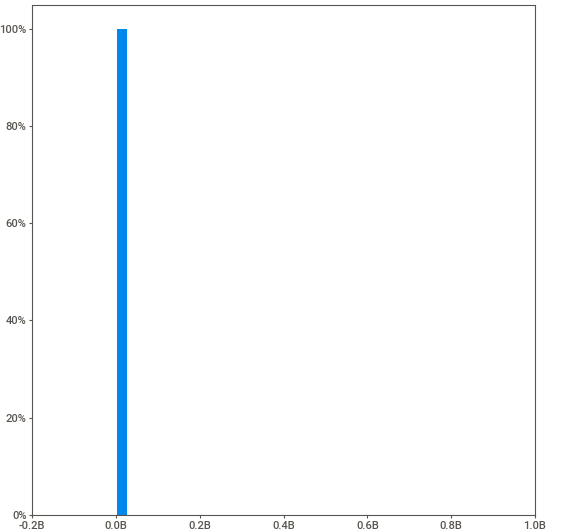
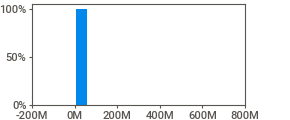
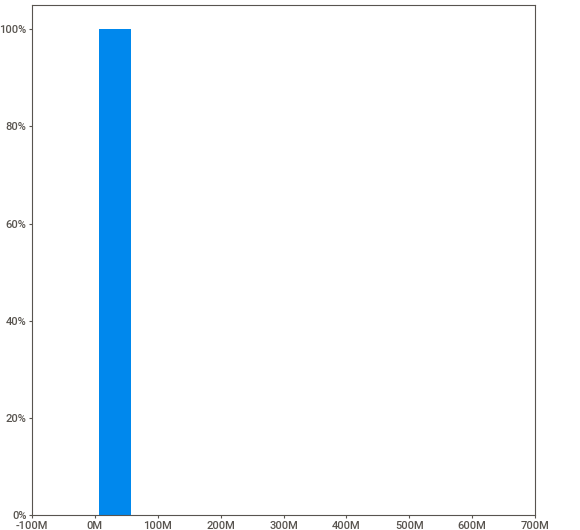
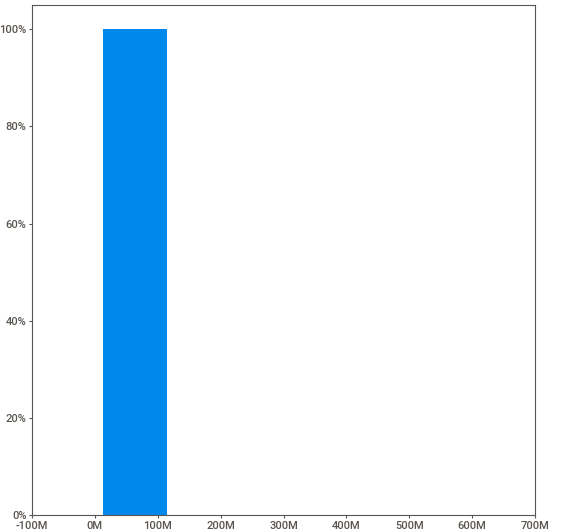
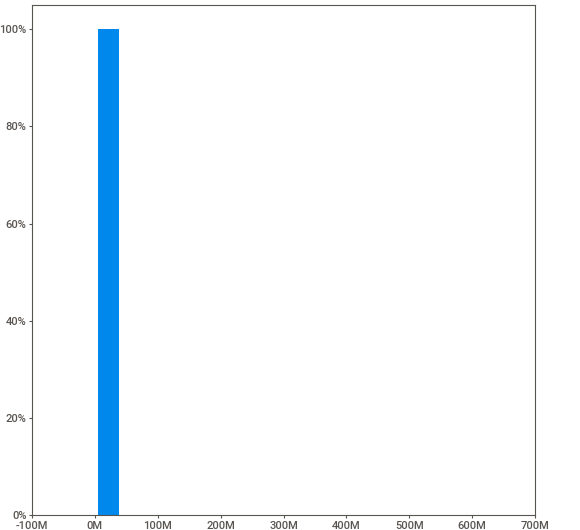
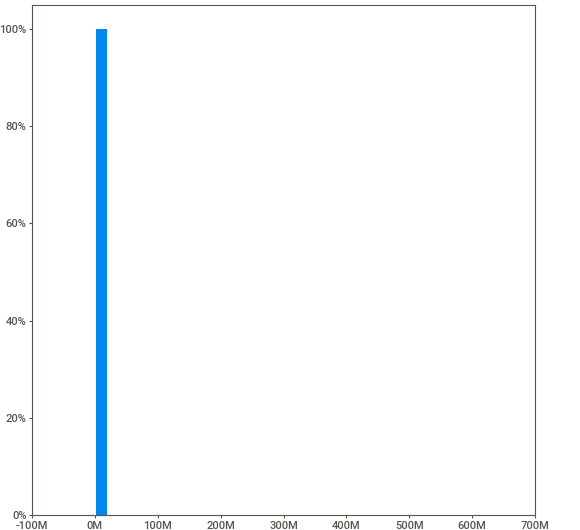
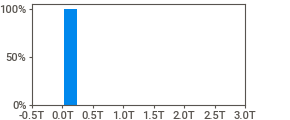
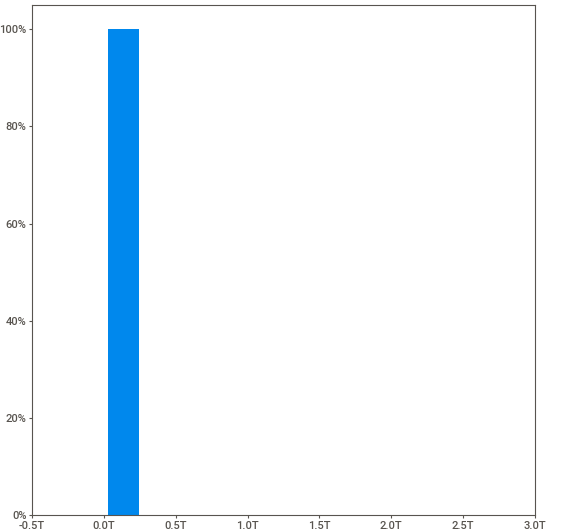
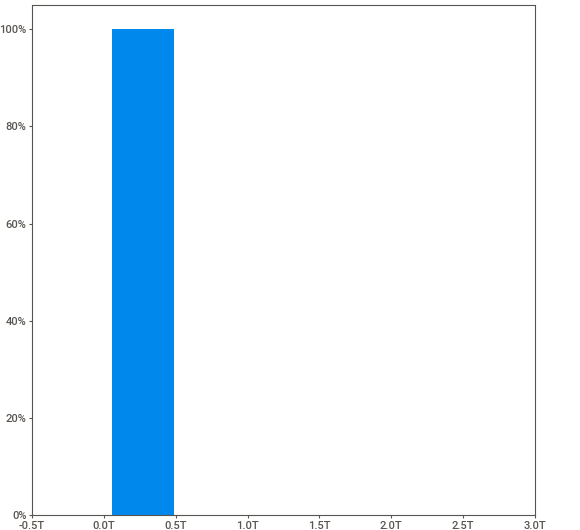
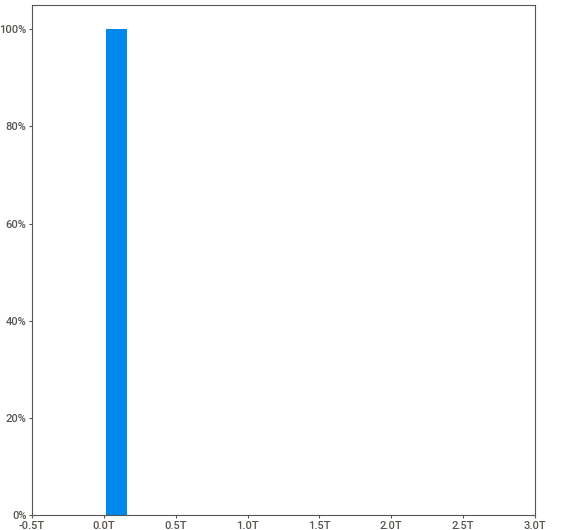
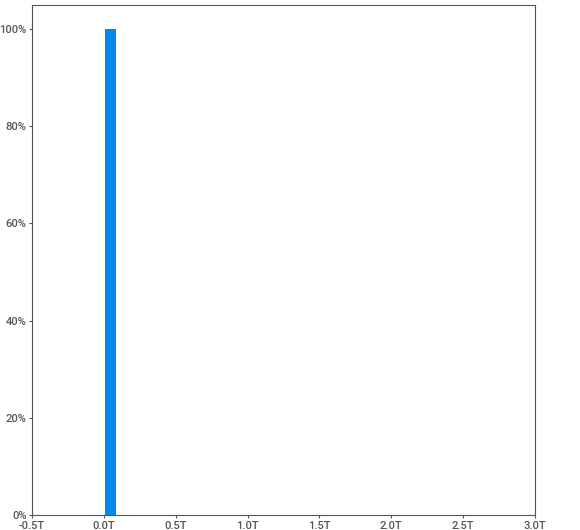
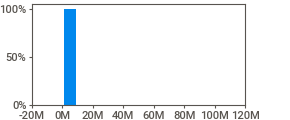
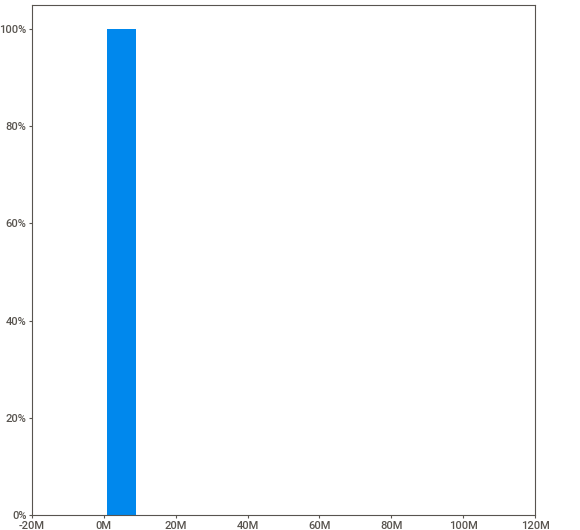
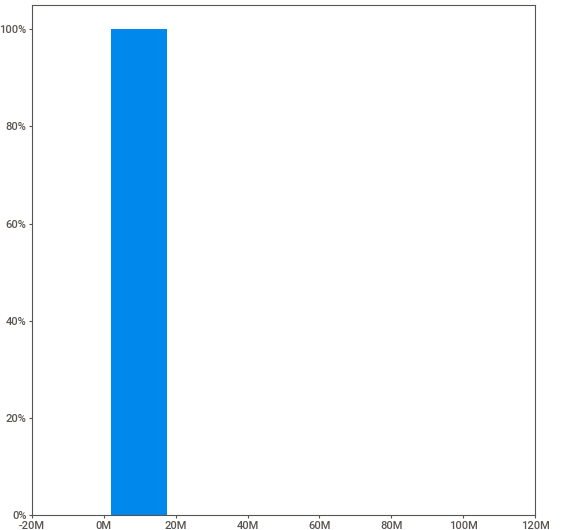
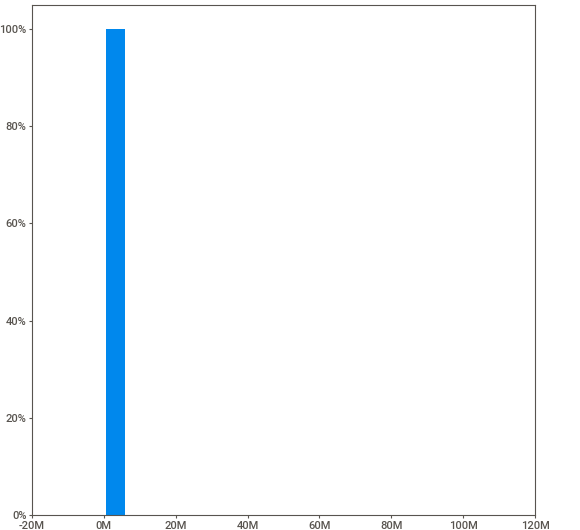
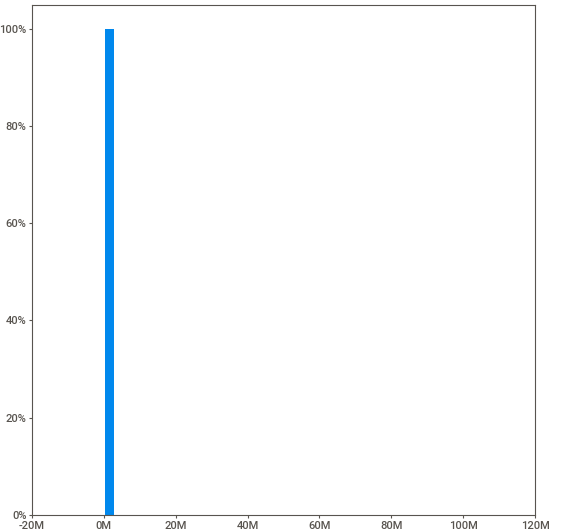
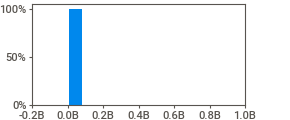
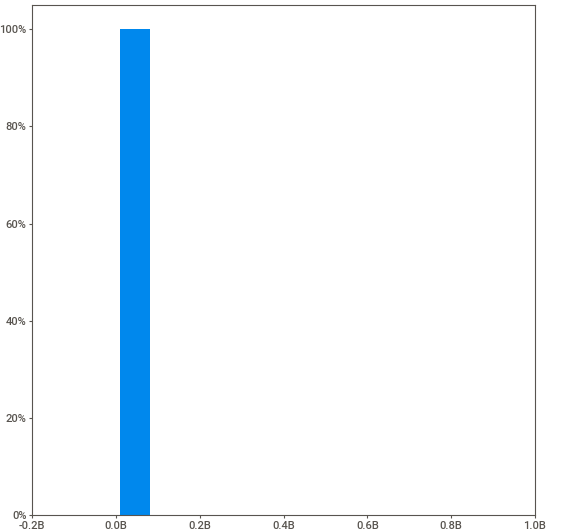
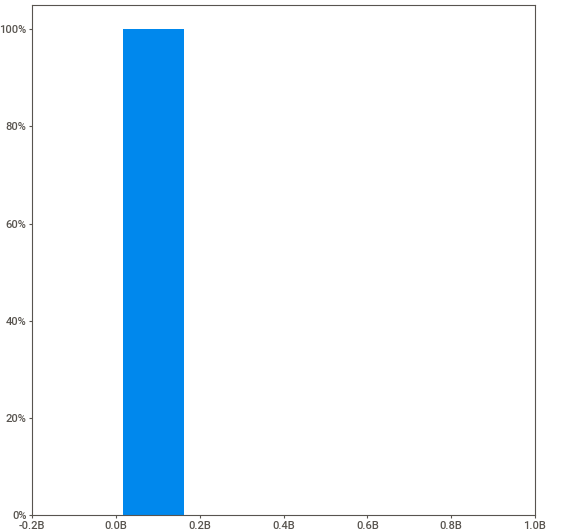
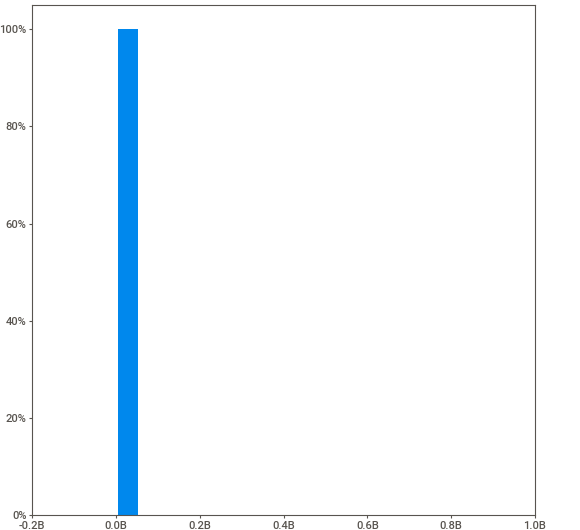
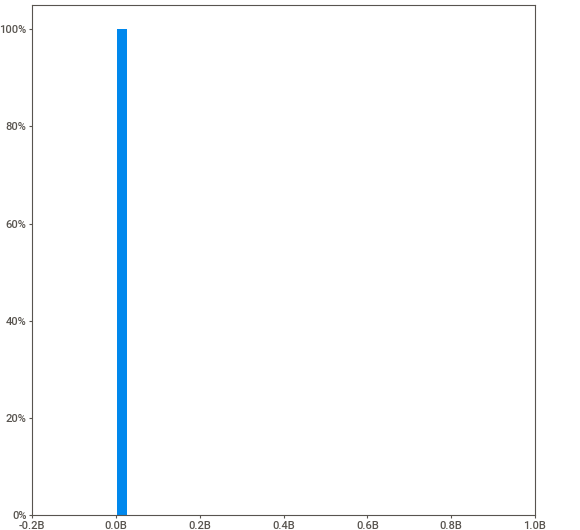
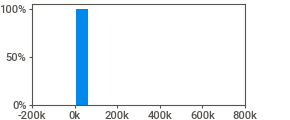
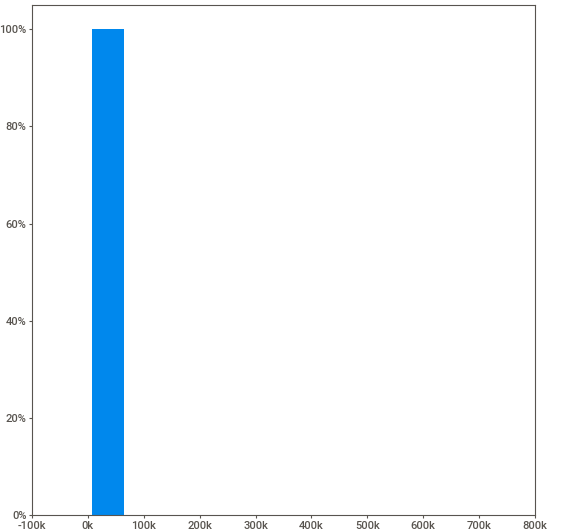
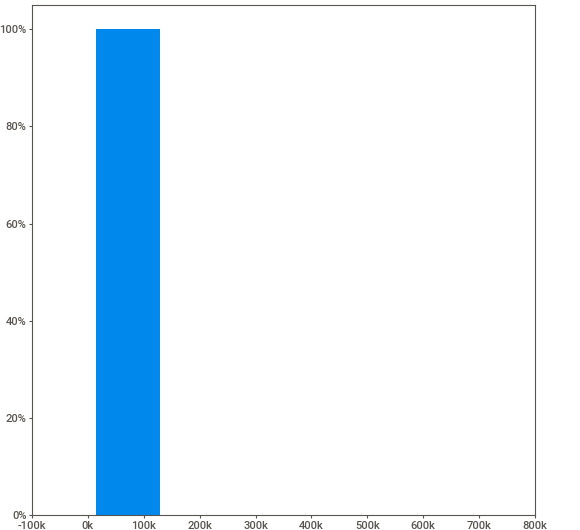
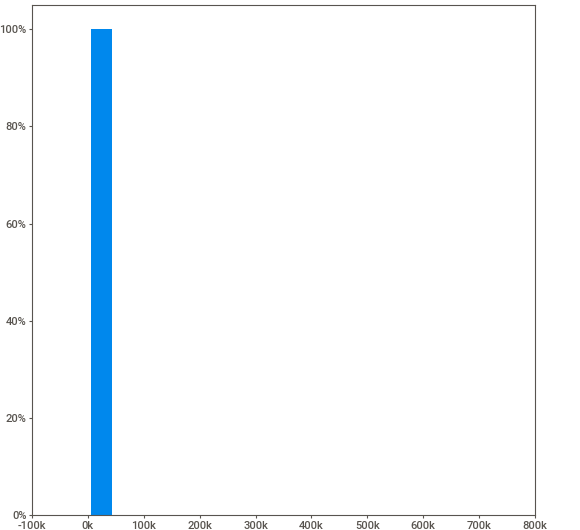
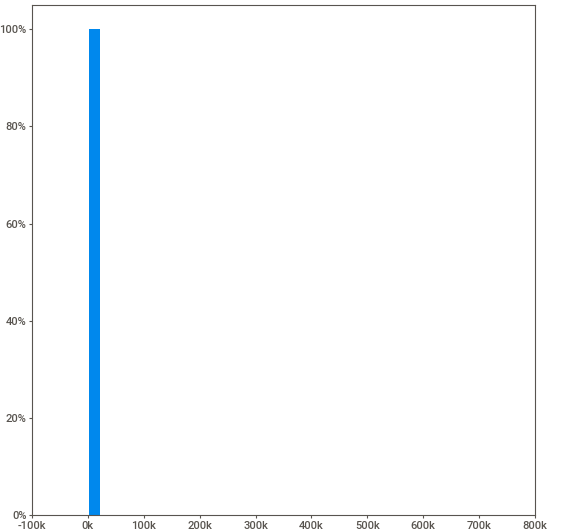
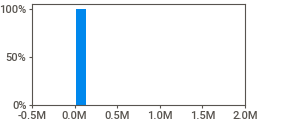
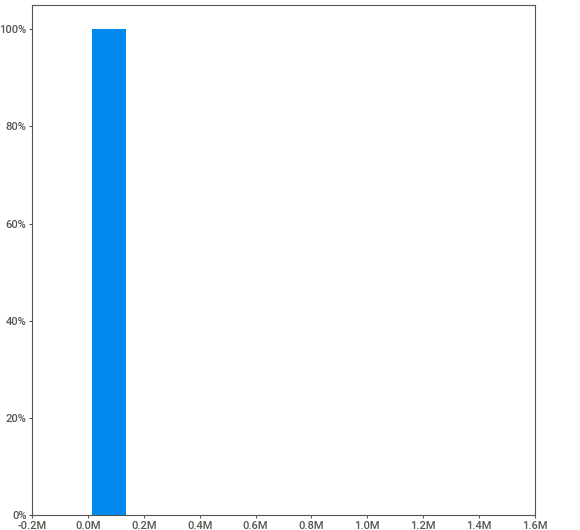
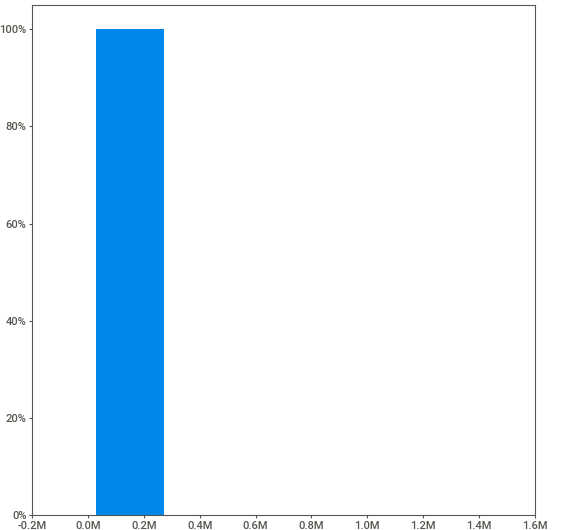
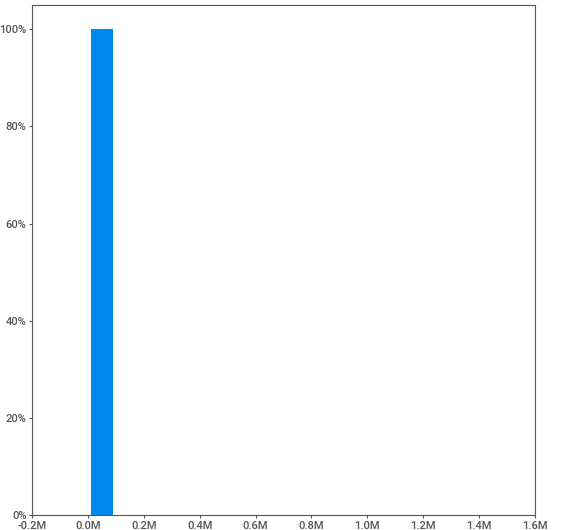
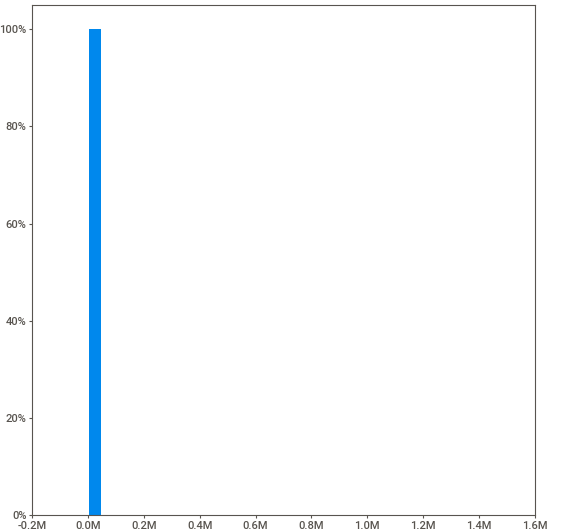
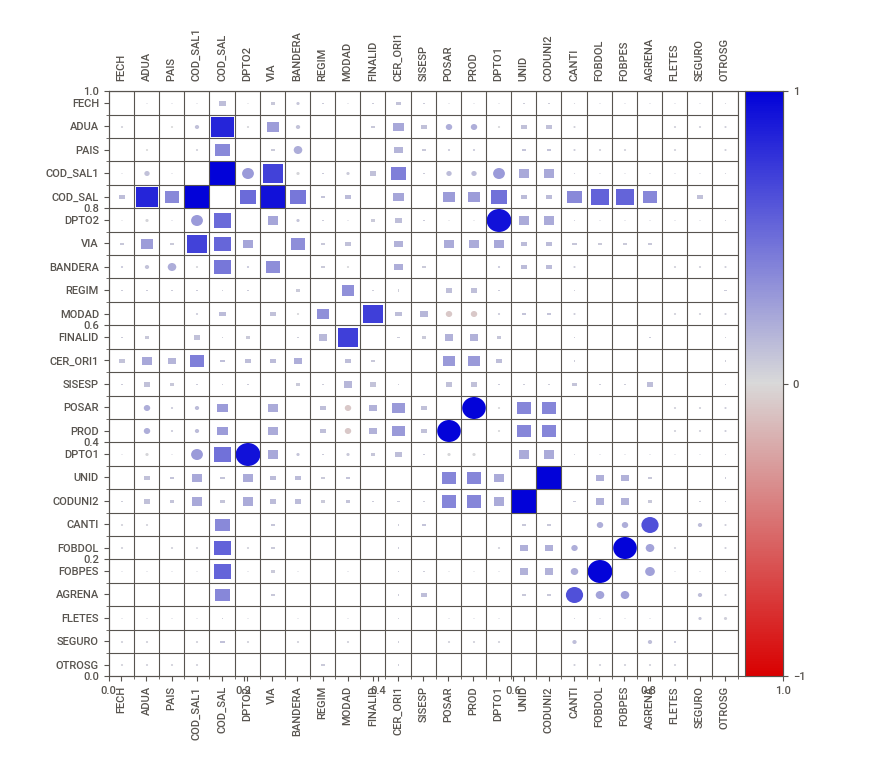
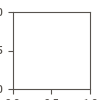

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

In [ ]:
%pip install rdt # librería para realizar predicciones de forma rápida - coodificación de las variables categóricas y numéricas

In [ ]:
%pip install flaml # librería para realizar predicciones de forma rápida - optimización de hiperparámetros

In [ ]:
bbdd2.PROD.value_counts()

PROD
603     43000
3304    13169
6204    10991
901      9909
3923     9250
        ...  
8401        1
1007        1
5307        1
8606        1
9304        1
Name: count, Length: 1095, dtype: int64

In [ ]:
bbdd_final.PROD.value_counts()[:10] # identificamos la variable objetivo

PROD
0603    353859
3304     75403
0901     68169
6204     61349
3923     53478
0810     47665
3004     46400
6212     43072
3305     36346
6104     33562
Name: count, dtype: int64

In [ ]:
bbdd_final.PROD.value_counts().index

Index(['0603', '3304', '6204', '0901', '3923', '0810', '3004', '6212', '3305',
       '6104',
       ...
       '2514', '4405', '2601', '7118', '6906', '7014', '7203', '2846', '2611',
       '9614'],
      dtype='object', name='PROD', length=1149)

In [ ]:
bbdd_final = pd.concat([bbdd1, bbdd2, bbdd3, bbdd4, bbdd5, bbdd6]) # concatenamos las bases de datos

PROD
0603    68405
3304    14715
0901    14071
6204    10955
3923     9090
3004     8379
6212     7696
0810     7373
3305     6708
6104     5832
3926     5555
4202     5323
5407     4707
1704     4561
9403     4411
0803     4293
6108     4224
8708     4217
6109     4014
2008     3989
Name: count, dtype: int64


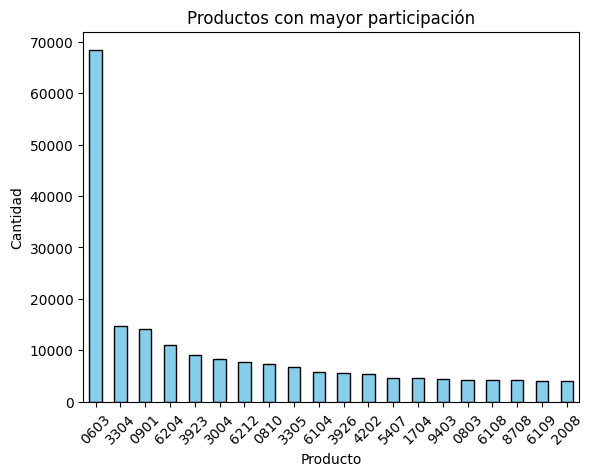

In [ ]:
import matplotlib.pyplot as plt

N = 20  # Cambia el número según lo que necesites
top_productos = bbdd1.PROD.value_counts().nlargest(N)
print(top_productos)


top_productos.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Productos con mayor participación")
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


In [ ]:
BBDD2_.columns

Index(['FECH', 'ADUA', 'PAIS', 'COD_PAI4', 'COD_SAL1', 'COD_SAL', 'DPTO2',
       'VIA', 'BANDERA', 'REGIM', 'MODAD', 'FINALID', 'CER_ORI1', 'SISESP',
       'POSAR', 'DPTO1', 'UNID', 'CODUNI2', 'CANTI', 'PNK', 'FOBDOL', 'FOBPES',
       'AGRENA', 'FLETES', 'SEGURO', 'OTROSG', 'RAZ_SIAL'],
      dtype='object')

🔹 Datos originales:
    FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
11  1901     3   23      DEU         3     BOG      5    4      249      1   
12  1901     3   23      DEU         3     BOG      5    4      253      1   
17  1901     3   23      DEU         3     BOG     11    4       23      1   
19  1901     3   23      DEU         3     BOG     11    4       23      1   
20  1901     3   23      DEU         3     BOG     11    4       23      1   

    ...  UNID  CODUNI2    CANTI     PNK      FOBPES  AGRENA  FLETES SEGURO  \
11  ...    11        U  2275.00  390.00  2782047.73    0.00    0.00   0.00   
12  ...    11        U  1800.00  226.00  3464117.80    0.00    0.00   0.00   
17  ...    11        U  5180.00  407.50  5297353.14 1568.95    0.00   0.00   
19  ...    11        U 13650.00  379.00  7011898.32    0.00    0.00   0.00   
20  ...    11        U 56000.00 1795.00 28579336.70    0.00    0.00   0.00   

    OTROSG                       RAZ_SIAL 

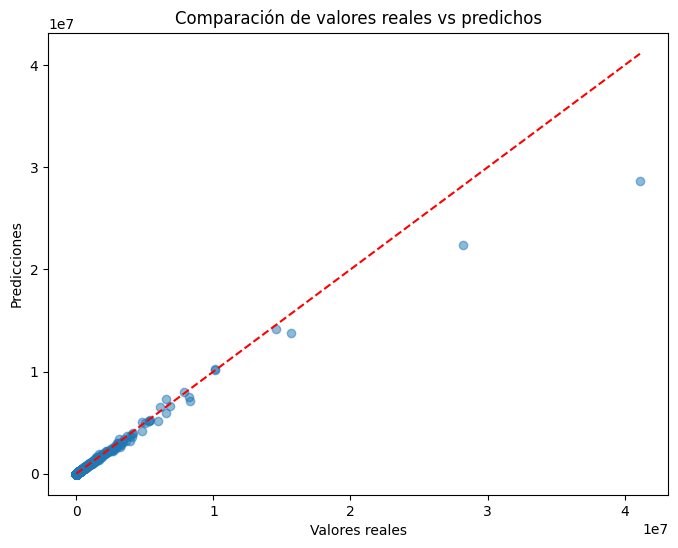

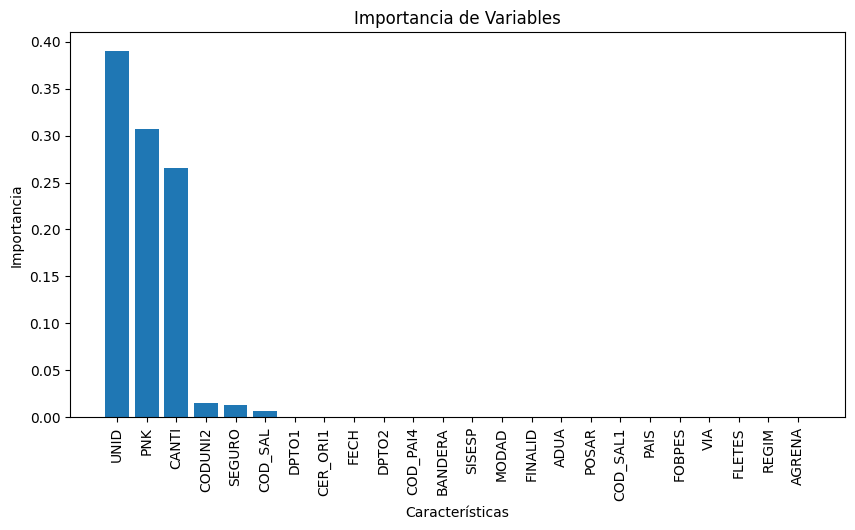

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
269  1901     3   63      ARG         3     BOG     11    4       63      1   
283  1901     3   63      ARG         3     BOG     11    4      249      1   
545  1901     3   97      BOL         3     BOG     11    4       63      1   
650  1901     3   97      BOL         3     BOG     25    4      239      1   
654  1901     3   97      BOL         3     BOG     25    4      249      1   

     ...  UNID  CODUNI2   CANTI     PNK      FOBPES   AGRENA  FLETES SEGURO  \
269  ...    33       KG  907.14  907.14 51153148.20     0.00    0.00   0.00   
283  ...    33       KG  259.00  259.00 83259340.13     0.00    0.00   0.00   
545  ...    33       KG 1847.47 1847.47  7379875.64     0.00    0.00   0.00   
650  ...    33       KG  147.62  147.62 23395636.61     0.00    0.00   0.00   
654  ...    33       KG  283.89  283.89 36512499.73 10783.86    0.00   0.00   

     OTROSG                  R

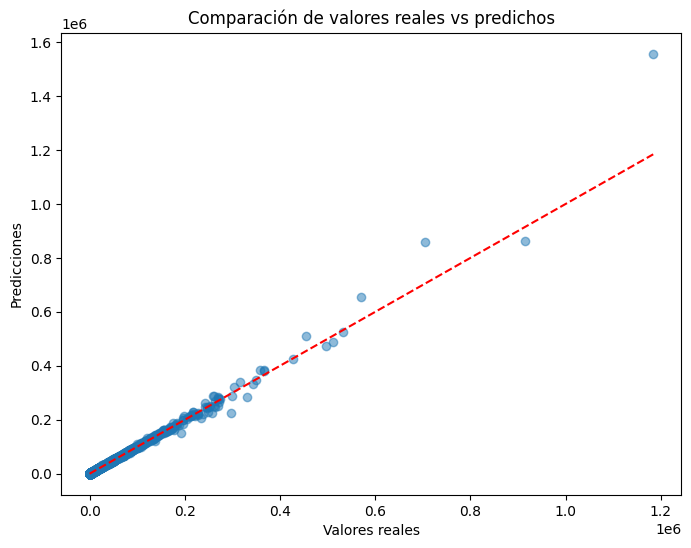

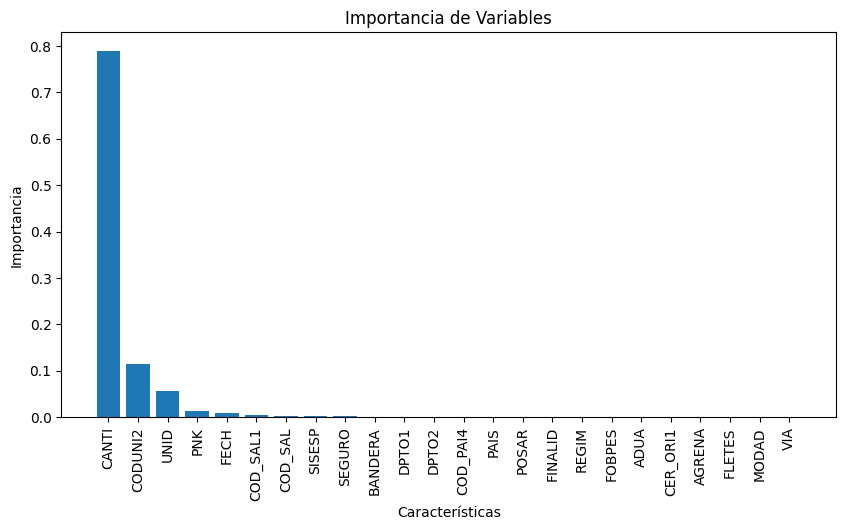

🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
129   1901     3   23      DEU         3     BOG     25    4      245      1   
233   1901     3   27      ABW         3     BOG     66    4      211      1   
382   1901     3   69      AUS         3     BOG     25    4      249      1   
1279  1901     3  169      COL         3     BOG     11    3      169      1   
1280  1901     3  169      COL         3     BOG     11    3      169      1   

      ...  UNID  CODUNI2   CANTI     PNK      FOBPES  AGRENA  FLETES SEGURO  \
129   ...    33       KG 2485.00 2485.00 37456186.32    0.00 3082.00   0.00   
233   ...    33       KG 2000.00 2000.00 46800144.00    0.00    0.00   0.00   
382   ...    33       KG  139.00  139.00 45249279.58    0.00  989.00  90.14   
1279  ...    33       KG  144.00  144.00  5944552.64    0.00    0.00   0.00   
1280  ...    33       KG   76.50   76.50  2266376.23    0.00    0.00   0.00   

      OTROSG            

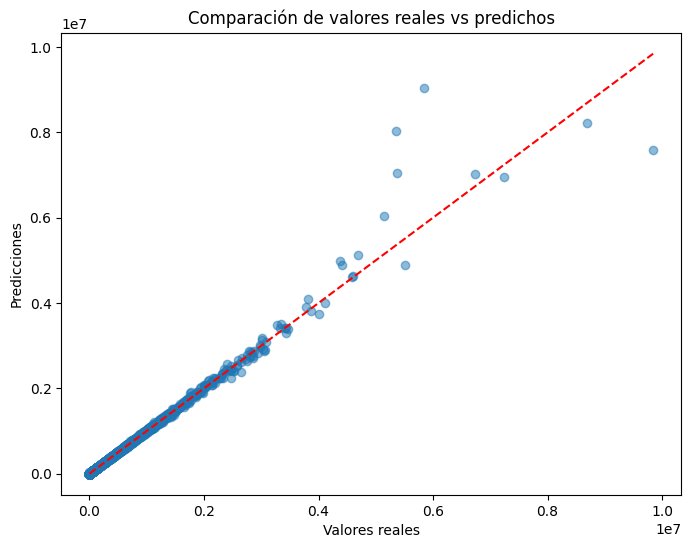

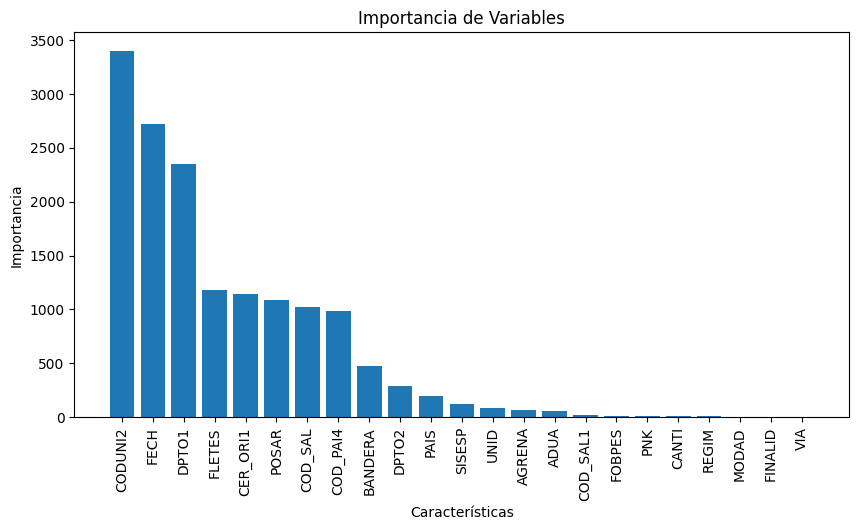

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
14   1901     3   23      DEU         3     BOG      5    4      850      1   
168  1901     3   27      ABW         3     BOG     11    4      239      1   
244  1901     3   53      SAU         3     BOG      5    4      249      1   
245  1901     3   53      SAU         3     BOG      5    4      249      1   
246  1901     3   53      SAU         3     BOG      5    4      249      1   

     ...  UNID  CODUNI2  CANTI   PNK     FOBPES  AGRENA  FLETES SEGURO  \
14   ...    11        U  55.00  6.05 6619706.33    0.00    0.00   0.00   
168  ...    11        U  36.00 12.66 1622693.91    0.00   64.87   3.25   
244  ...    11        U  16.00  3.06 2789649.55    0.00   79.71   8.85   
245  ...    11        U   6.00  1.15 1413980.30    0.00   40.40   4.49   
246  ...    11        U   6.00  1.15 1132696.52    0.00   32.36   3.59   

     OTROSG                                        RAZ_SIAL 

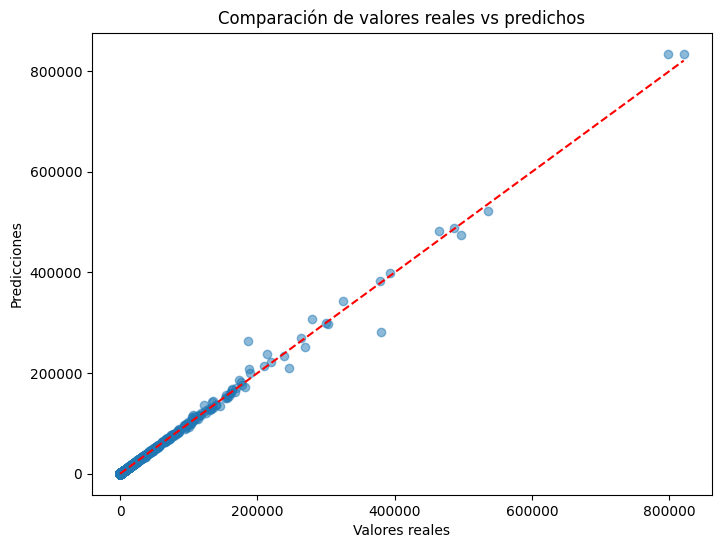

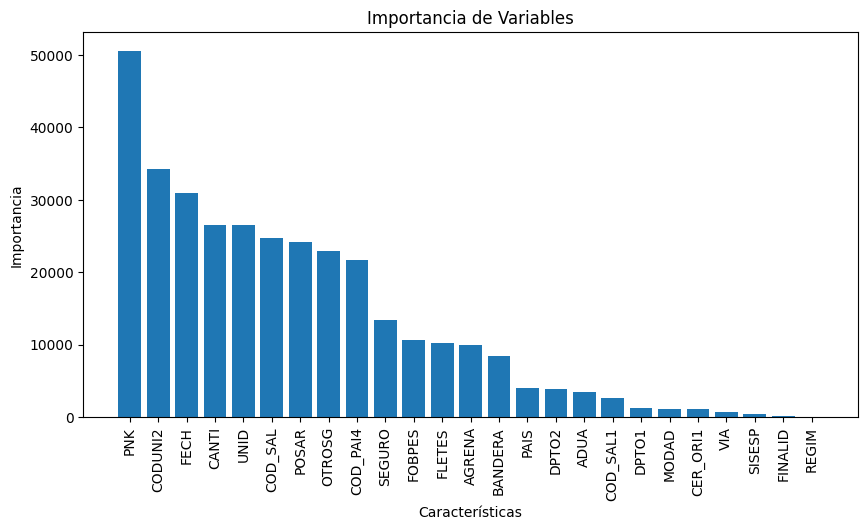

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
114  1901     3   23      DEU         3     BOG     11    4      580      1   
115  1901     3   23      DEU         3     BOG     11    4      580      1   
154  1901     3   23      DEU         3     BOG     76    4      249      1   
155  1901     3   23      DEU         3     BOG     76    4      249      1   
156  1901     3   26      ARM         3     BOG     11    4      573      1   

     ...  UNID  CODUNI2     CANTI    PNK      FOBPES  AGRENA  FLETES SEGURO  \
114  ...    11        U  55000.00 394.00  3457542.00    0.00 2788.41  13.61   
115  ...    11        U  10000.00  22.00   314322.00    0.00  253.49   1.24   
154  ...    11        U  93553.00 427.53 23102264.38 7106.96 3210.39   0.00   
155  ...    11        U 275604.00 124.15  9066154.99 2116.42  916.69   0.00   
156  ...    11        U   8000.00  74.00  1305962.71    0.00  590.00   1.30   

     OTROSG                 RA

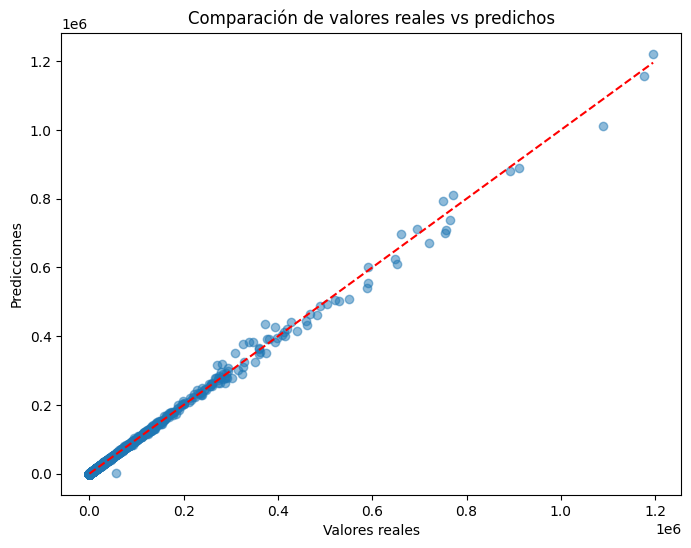

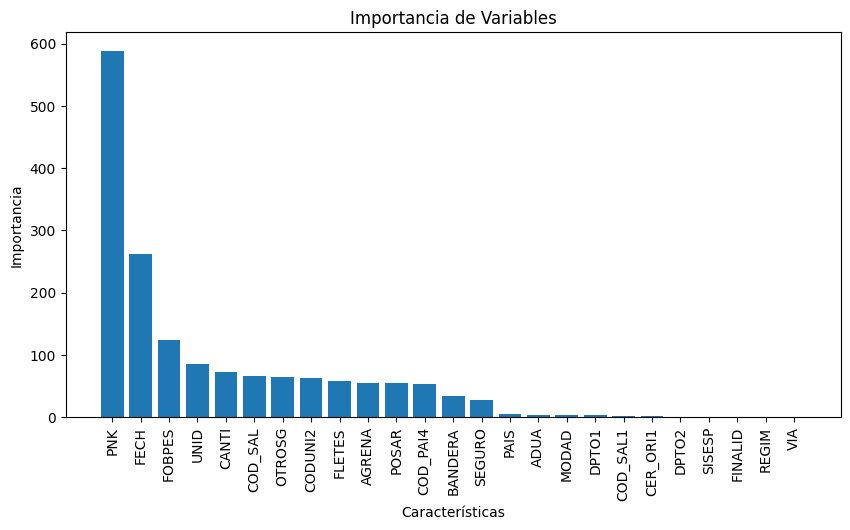

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
483  1901     3   88      BLZ         3     BOG     11    4      580      1   
524  1901     3   97      BOL         3     BOG     11    4       63      1   
528  1901     3   97      BOL         3     BOG     11    4       63      1   
529  1901     3   97      BOL         3     BOG     11    4       63      1   
530  1901     3   97      BOL         3     BOG     11    4       63      1   

     ...  UNID  CODUNI2  CANTI    PNK      FOBPES  AGRENA  FLETES SEGURO  \
483  ...    33       KG 152.21 152.21 20465799.96    0.00  481.05  19.13   
524  ...    33       KG  98.60  98.60 48878953.97    0.00    0.00   0.00   
528  ...    33       KG 153.00 153.00 24612538.38 7579.50    0.00   0.00   
529  ...    33       KG  70.00  70.00 11443253.12 3257.69    0.00   0.00   
530  ...    33       KG  65.11  65.11 11804547.63 2290.38    0.00   0.00   

     OTROSG                      RAZ_SIAL  
483 

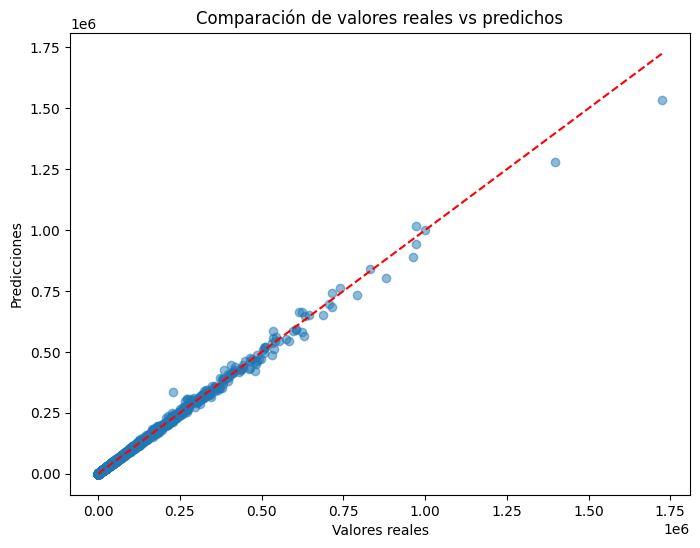

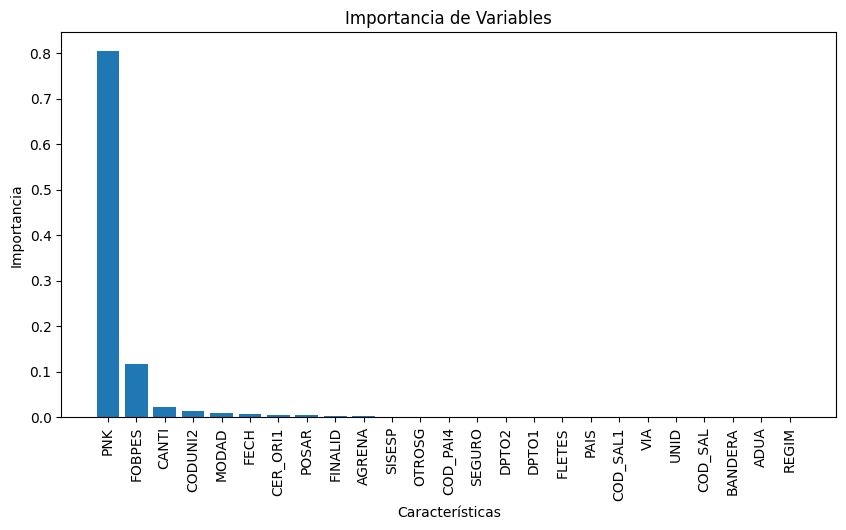

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
282  1901     3   63      ARG         3     BOG     11    4      249      1   
512  1901     3   97      BOL         3     BOG      5    4       63      1   
576  1901     3   97      BOL         3     BOG     11    4       63      1   
577  1901     3   97      BOL         3     BOG     11    4       63      1   
578  1901     3   97      BOL         3     BOG     11    4       63      1   

     ...  UNID  CODUNI2   CANTI    PNK      FOBPES  AGRENA  FLETES SEGURO  \
282  ...    11        U  300.00 144.20 12656991.36 2729.69    0.00   0.00   
512  ...    11        U 1386.00 155.74 34186565.08    0.00    0.00   0.00   
576  ...    11        U  734.00  63.71 11532989.25    0.00    0.00   0.00   
577  ...    11        U   18.00   8.32   503862.58    0.00    0.00   0.00   
578  ...    11        U   21.00   3.82   276744.24    0.00    0.00   0.00   

     OTROSG                      RAZ_SIAL 

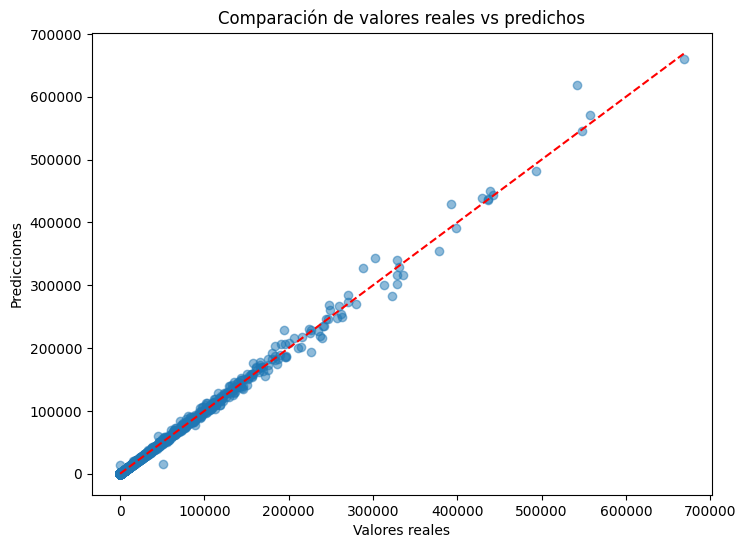

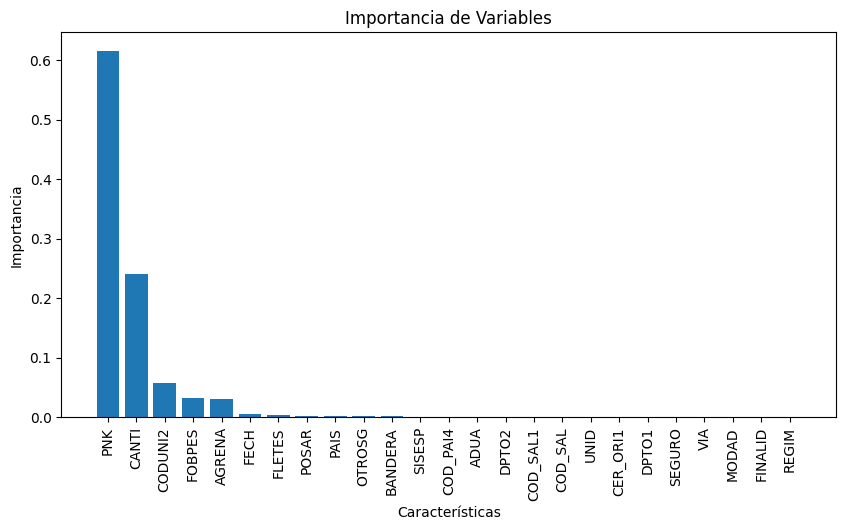

🔹 Datos originales:
   FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
5  1901     3   23      DEU         3     BOG      5    4       23      1   
6  1901     3   23      DEU         3     BOG      5    4       23      1   
7  1901     3   23      DEU         3     BOG      5    4       23      1   
8  1901     3   23      DEU         3     BOG      5    4       23      1   
9  1901     3   23      DEU         3     BOG      5    4       23      1   

   ...  UNID  CODUNI2  CANTI    PNK     FOBPES  AGRENA  FLETES SEGURO  OTROSG  \
5  ...    33       KG 154.00 154.00 3679161.33 1164.10    0.00   0.00    0.00   
6  ...    33       KG 150.00 150.00 2433600.40  770.00    0.00   0.00    0.00   
7  ...    33       KG 128.00 128.00 2614382.14  827.20    0.00   0.00    0.00   
8  ...    33       KG  24.00  24.00  530967.36  168.00    0.00   0.00    0.00   
9  ...    33       KG  72.00  72.00 1547390.59  489.60    0.00   0.00    0.00   

                              

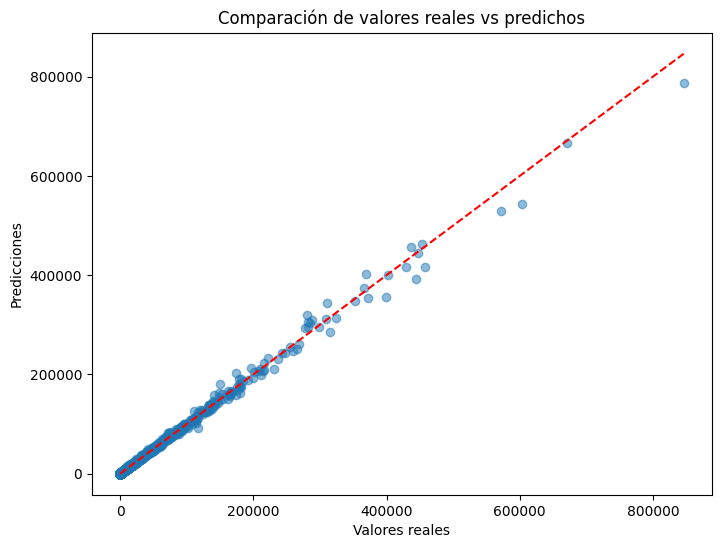

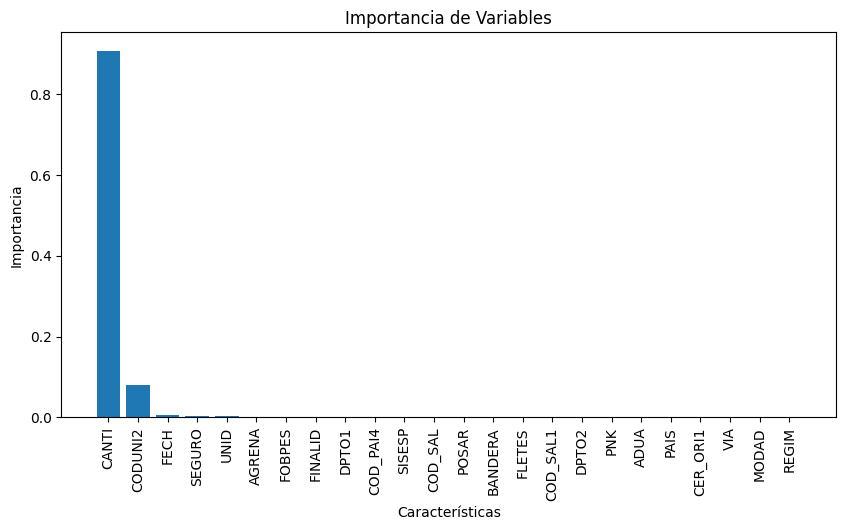

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
36   1901     3   23      DEU         3     BOG     11    4       23      1   
658  1901     3   97      BOL         3     BOG     25    4      249      1   
664  1901     3   97      BOL         3     BOG     25    4      249      1   
665  1901     3   97      BOL         3     BOG     25    4      249      1   
691  1901     3   97      BOL        35     BUN     25    1      434      1   

     ...  UNID  CODUNI2    CANTI      PNK       FOBPES   AGRENA   FLETES  \
36   ...    33       KG 10161.18 10161.18 211496114.30 27964.38 43047.68   
658  ...    33       KG  1641.36  1641.36  17682006.32  5463.44     0.00   
664  ...    33       KG   748.76   748.76   5901217.48     0.00     0.00   
665  ...    33       KG    41.58    41.58    465656.67     0.00     0.00   
691  ...    33       KG   321.64   321.64   3436570.08  1080.96     0.00   

    SEGURO  OTROSG                 RAZ_SIAL  
36

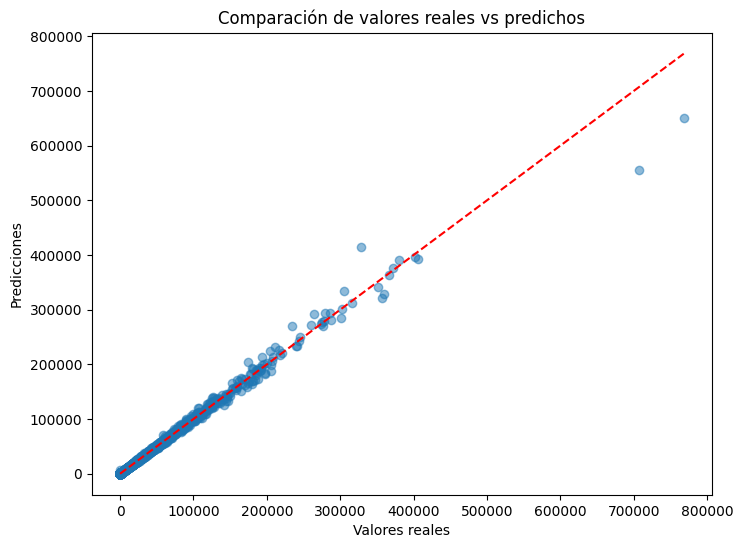

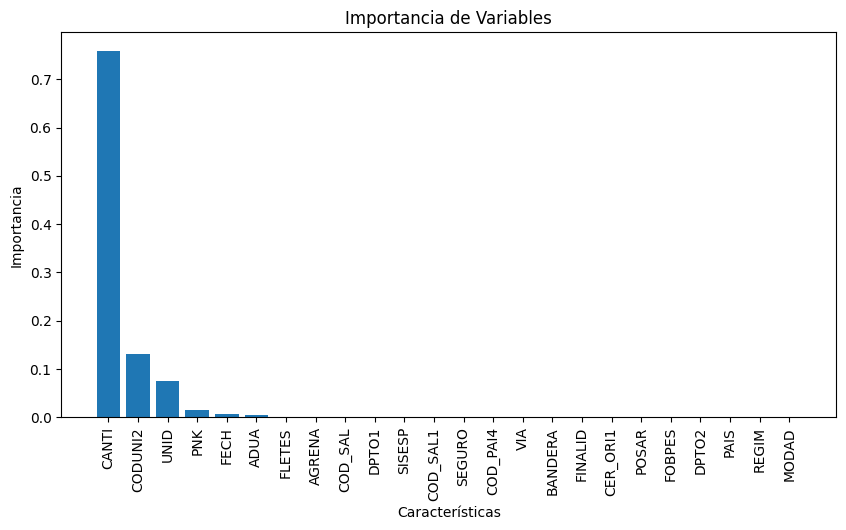

🔹 Datos originales:
     FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
430  1901     3   87      BEL         3     BOG      5    4      850      1   
513  1901     3   97      BOL         3     BOG      5    4      249      1   
514  1901     3   97      BOL         3     BOG      5    4      249      1   
551  1901     3   97      BOL         3     BOG     11    4       63      1   
552  1901     3   97      BOL         3     BOG     11    4       63      1   

     ...  UNID  CODUNI2  CANTI   PNK     FOBPES  AGRENA  FLETES SEGURO  \
430  ...    11        U   3.00  1.26  595125.91    0.00   11.81  10.54   
513  ...    11        U   5.00  1.43  130971.94    0.00    0.00   0.00   
514  ...    11        U   6.00  1.88  269402.72    0.00    0.00   0.00   
551  ...    11        U 185.00 69.88 4573456.11    0.00    0.00   0.00   
552  ...    11        U 203.00 78.58 5000408.94    0.00    0.00   0.00   

     OTROSG                             RAZ_SIAL  
430    0.

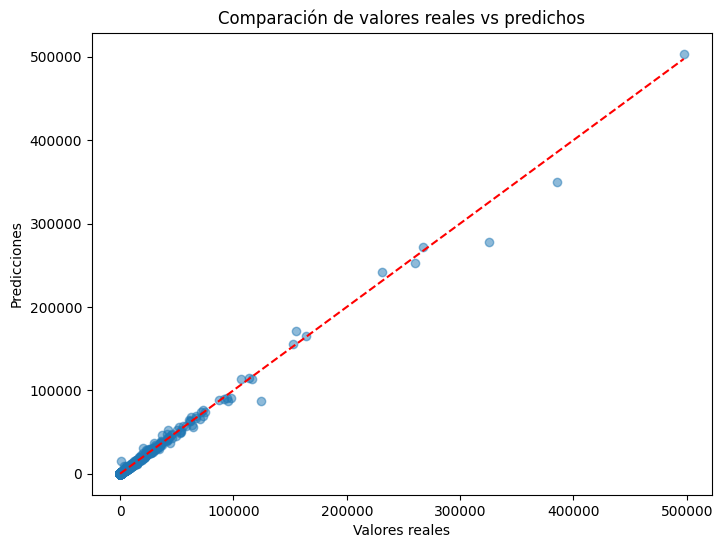

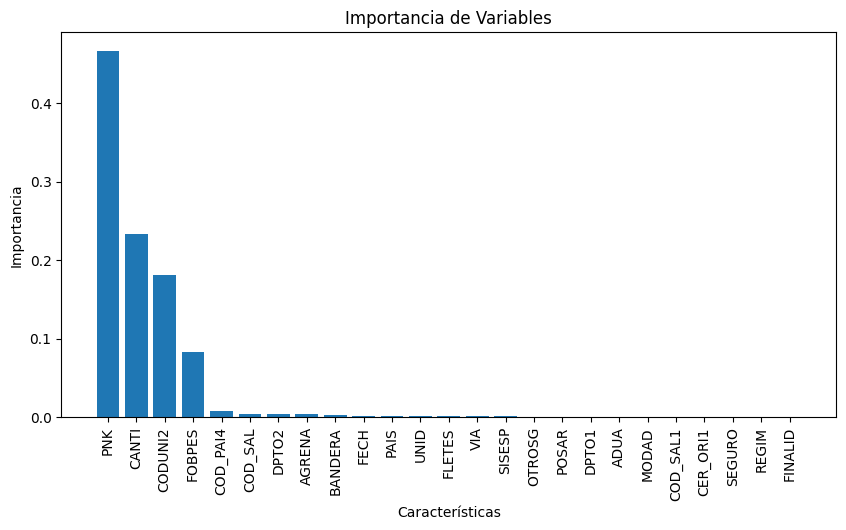

In [ ]:
productos_selec = top_productos.index.tolist()
automl_best_estimator_ = list()
automl_best_estimator_ = list()
y_pred_ = list()
r2_ = list()
rmse_ = list()
mae_ = list()
for producto in productos_selec:
    bbdd2 = bbdd_final.dropna()
    bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
    BBDD2_ = bbdd2[bbdd2.PROD==producto]
    BBDD2_.drop(columns=['PROD'], inplace=True)

    # 3️⃣ Eliminar filas con valores nulos
    df = BBDD2_.dropna()

    # 4️⃣ Separar variable objetivo
    target_column = "FOBDOL"
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 5️⃣ Crear el transformador RDT 🚀
    ht = HyperTransformer()

    # 6️⃣ Detectar configuración automáticamente ✅
    ht.detect_initial_config(X)

    # 7️⃣ Ajustar y transformar los datos 🔄
    ht.fit(X)
    X_transformed = ht.transform(X)

    # 8️⃣ Convertir a DataFrame para visualizar 🔍
    X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

    # 9️⃣ Mostrar comparación antes y después de la transformación
    print("🔹 Datos originales:")
    print(X.head())

    print("\n🔹 Datos transformados:")
    print(X_transformed.head())

    # 🔟 Separar en entrenamiento y prueba con partición de 80% de entrenamiento y 20% de validación
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    from flaml import AutoML

    # Inicializar AutoML
    automl = AutoML()

    # Configurar y entrenar FLAML
    automl.fit(
        X_train, y_train,    # datos de entrenamiento
        task="regression",   # Tipo de problema
        time_budget=300,     # Tiempo límite en segundos (ajustar según tu caso)
        metric="r2",         # Métrica para evaluar (puedes cambiar a 'rmse', 'mae', etc.)
        verbose=1            # Mostrar logs de entrenamiento
    )

    # Ver el mejor modelo encontrado
    print("Mejor modelo encontrado:", automl.best_estimator)

    # Hacer predicciones con el modelo optimizado
    y_pred = automl.predict(X_test)

    # Evaluar el modelo
    from sklearn.metrics import mean_squared_error, r2_score

    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("Mejor modelo encontrado:", automl.best_estimator)
    print("Mejores parámetros del modelo:", automl.best_config)

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Hacer predicciones en el conjunto de prueba
    y_pred = automl.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    automl_best_estimator_.append(automl.best_estimator)
    automl_best_estimator_.append(automl.best_estimator)
    y_pred_.append(y_pred)
    r2_.append(r2)
    rmse_.append(rmse)
    mae_.append(mae)

    # Mostrar métricas
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Línea ideal
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Comparación de valores reales vs predichos")
    plt.savefig(f"comparacion_{producto}.png")
    plt.show()

    import numpy as np

    # Obtener importancia de variables si está disponible
    if hasattr(automl.model, "feature_importances_"):
        importances = automl.model.feature_importances_
        feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

        sorted_indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 5))
        plt.bar(range(len(importances)), importances[sorted_indices], align="center")
        plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
        plt.xlabel("Características")
        plt.ylabel("Importancia")
        plt.title("Importancia de Variables")
        plt.savefig(f"importancia_{producto}.png")
        plt.show()

